In [2]:
import numpy as np
import pandas as pd  # import pandas
import matplotlib.pyplot as plt
import seaborn as sns   # import seaborn for visualisastion
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import t
from scipy.stats import wilcoxon
from scipy.stats import ranksums
from scipy.stats import mannwhitneyu
from scipy import stats
from scipy.stats import sem
import pingouin as pt
from statistics import mean
import easygui
import itertools
from statistics import median
    

In [3]:
df = easygui.fileopenbox(title="Select a file", filetypes= None)
df = pd.read_excel(df)

column_list = df.columns.tolist()
column_list = column_list[3:]

pre_opto = column_list[0:16]
opto = column_list[16:32]
post_opto = column_list[32:]
check_noramlity = pd.DataFrame(columns = ["W", "p-value", "normal", "feature", "group"])

In [5]:
#df.head()
df.loc[df["grupa"]== "e"]

,kohorta,szczur,grupa,Pre_opto_time_in,Pre_opto_time_out,Pre_opto_total_Immob,Pre_opto_in_Immob,Pre_opto_out_Immob,Pre_opto_total_Mob,Pre_opto_in_Mob,...,Post_opto_in_Mob,Post_opto_out_Mob,Post_opto_total_Dist_sum,Post_opto_in_Dist_sum,Post_opto_out_Dist_sum,Post_opto_total_V_Mob,Post_opto_in_V_Mob,Post_opto_out_V_Mob,Post_opto_N_epi_Mob,Post_opto_N_epi_Immob
6,a_prim,7,e,27.2,283.2,220.59,13.3,207.3,89.79,13.9,...,25.2,88.1,1955.89,362.2,1593.7,17.27,14.4,18.1,73,72
7,a_prim,11,e,141.4,168.9,146.72,62.8,84.0,163.65,78.7,...,33.1,14.9,752.24,543.8,208.5,15.67,16.4,14.0,32,31
8,a_prim,12,e,14.7,295.7,161.10,1.7,159.4,149.28,12.9,...,8.6,45.7,1029.68,169.9,859.8,18.98,19.8,18.8,21,21
9,c,1,e,42.2,268.1,151.76,11.3,140.4,158.62,30.9,...,2.5,35.8,729.84,69.4,660.5,19.05,27.6,18.5,32,32
12,c,4,e,10.8,299.7,200.65,5.5,195.2,109.76,5.3,...,1.0,41.7,762.53,14.5,748.0,17.86,14.0,18.0,23,22
14,d,7,e,10.8,291.8,170.13,0.9,169.2,132.43,9.8,...,4.9,57.6,1324.18,84.6,1239.6,21.21,17.4,21.5,41,41


In [6]:
column_list = df.columns.tolist()
column_list = column_list[3:]

pre_opto = column_list[0:16]
opto = column_list[16:32]
post_opto = column_list[32:]
check_noramlity = pd.DataFrame(columns = ["W", "p-value", "normal", "feature", "group"])


In [7]:
pre_opto

['Pre_opto_time_in',
 'Pre_opto_time_out',
 'Pre_opto_total_Immob',
 'Pre_opto_in_Immob',
 'Pre_opto_out_Immob',
 'Pre_opto_total_Mob',
 'Pre_opto_in_Mob',
 'Pre_opto_out_Mob',
 'Pre_opto_total_Dist_sum',
 'Pre_opto_in_Dist_sum',
 'Pre_opto_out_Dist_sum',
 'Pre_opto_total_V_Mob',
 'Pre_opto_in_V_Mob',
 'Pre_opto_out_V_Mob',
 'Pre_opto_N_epi_Mob',
 'Pre_opto_N_epi_Immob']

In [8]:
n = 0
for i in column_list:
    ctrl_group = pt.normality(df.loc[df["grupa"] == "c", i]).values.tolist()
    ctrl_group = list(itertools.chain(*ctrl_group))
    ctrl_group.append(i)
    ctrl_group.append("c")
    
    exp_group = pt.normality(df.loc[df["grupa"] == "e", i]).values.tolist()
    exp_group = list(itertools.chain(*exp_group))
    exp_group.append(i)
    exp_group.append("e")
    
    check_noramlity.loc[n] = exp_group
    check_noramlity.loc[n+1] = ctrl_group
    n +=2

In [9]:
check_noramlity[0:60]

,W,p-value,normal,feature,group
0,0.689359,0.004766,False,Pre_opto_time_in,e
1,0.933975,0.520093,True,Pre_opto_time_in,c
2,0.692156,0.005105,False,Pre_opto_time_out,e
3,0.947673,0.664544,True,Pre_opto_time_out,c
4,0.895909,0.350311,True,Pre_opto_total_Immob,e
5,0.954882,0.743543,True,Pre_opto_total_Immob,c
6,0.687165,0.004515,False,Pre_opto_in_Immob,e
7,0.890658,0.202660,True,Pre_opto_in_Immob,c
8,0.938996,0.651117,True,Pre_opto_out_Immob,e
9,0.976739,0.945439,True,Pre_opto_out_Immob,c


In [10]:
day = ["Pre_opto", "Opto", "Post_opto"]
dv_anova = pd.DataFrame(columns = ["group", "day", "subject"])
group_feature_exp = list(np.repeat("e", 18))
group_feature_control = list(np.repeat("c", 27))
group_feature = group_feature_exp + group_feature_control
day_feature_exp = list(np.repeat(day, 6))
day_feature_ctrl = list(np.repeat(day, 9))
day_feature = day_feature_exp + day_feature_ctrl
subject_exp = list(np.arange(1,7))  + list(np.arange(1,7)) + list(np.arange(1,7)) 
subject_control = list(np.arange(7,16))  + list(np.arange(7,16)) + list(np.arange(7,16))
subject_feature = subject_exp + subject_control
dv_anova["group"] = group_feature
dv_anova["day"] = day_feature
dv_anova["subject"] = subject_feature

#### Distance

In [11]:
# total dist
columns_of_feature =  [x for x in column_list if "total_Dist_sum" in x]


In [12]:
exp_total_dist = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_total_dist_mean = [mean(x) for x in exp_total_dist]
exp_total_dist_sem = [sem(x) for x in exp_total_dist]
exp_total_dist_pre_opto, exp_total_dist_opto, exp_total_dist_post_opto = exp_total_dist[0], exp_total_dist[1], exp_total_dist[2]

control_total_dist = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_total_dist_mean = [mean(x) for x in control_total_dist]
control_total_dist_sem = [sem(x) for x in control_total_dist]
control_total_dist_pre_opto, control_total_dist_opto, control_total_dist_post_opto = control_total_dist[0], control_total_dist[1], control_total_dist[2]

flat_list_exp_dist = list(np.concatenate(exp_total_dist).flat)
flat_list_control_dist = list(np.concatenate(control_total_dist).flat)
dist_feature = flat_list_exp_dist + flat_list_control_dist
dv_anova["distance"] = dist_feature

In [13]:
# Pre_opto 
# exp_total_dist[0] vs control_total_dist[0]
pt.mwu(exp_total_dist[0], control_total_dist[0], alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,31.0,two-sided,0.688911,-0.148148,0.574074


In [14]:
median(exp_total_dist[0])

3020.2799999999997

In [15]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_total_dist_pre_opto, exp_total_dist_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,1.0,two-sided,0.0625,0.904762,0.944444


In [16]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_total_dist[0], control_total_dist[2], alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.003906,1.0,0.864198


In [17]:
# Opto
pt.mwu(exp_total_dist[1], control_total_dist[1], alternative='two-sided')


,U-val,alternative,p-val,RBC,CLES
MWU,22.0,two-sided,0.606993,0.185185,0.407407


In [18]:
median(exp_total_dist[1])

1708.52

In [19]:
# Post-opto
pt.mwu(exp_total_dist[2], control_total_dist[2], alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,21.0,two-sided,0.528671,0.222222,0.388889


In [20]:
median(exp_total_dist[2])

896.105

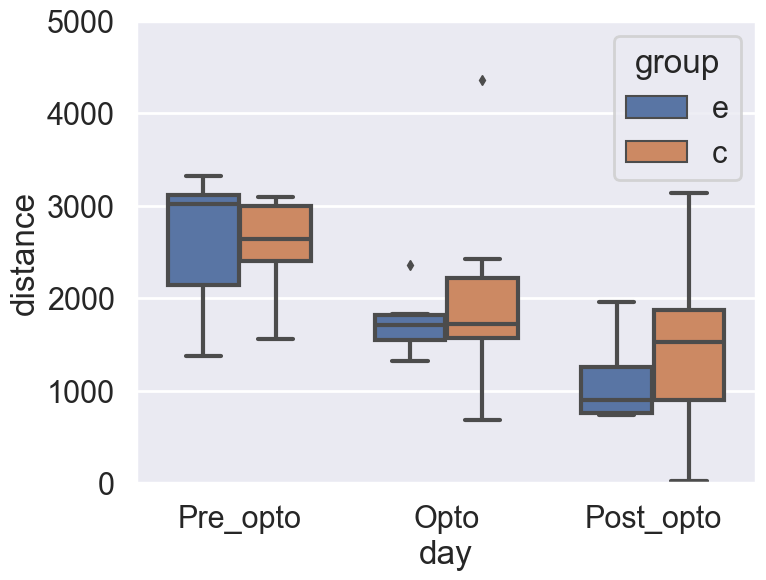

In [21]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "distance", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(0, 5000)
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/open_field/fig_new/total_dist.svg"
plt.savefig(save_fig_to)
plt.show()

In [138]:
# Distance in 
columns_of_feature =  [x for x in column_list if "_in_Dist_sum" in x]
columns_of_feature

['Pre_opto_in_Dist_sum', 'Opto_in_Dist_sum', 'Post_opto_in_Dist_sum']

In [139]:
exp_in_dist = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_in_dist_mean = [mean(x) for x in exp_in_dist]
exp_in_dist_sem = [sem(x) for x in exp_in_dist]
exp_in_dist_pre_opto, exp_in_dist_opto, exp_in_dist_post_opto = exp_in_dist[0], exp_in_dist[1], exp_in_dist[2]

control_in_dist = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_in_dist_mean = [mean(x) for x in control_in_dist]
control_in_dist_sem = [sem(x) for x in control_in_dist]
control_in_dist_pre_opto, control_in_dist_opto, control_in_dist_post_opto = control_in_dist[0], control_in_dist[1], control_in_dist[2]

flat_list_exp_in_dist = list(np.concatenate(exp_in_dist).flat)
flat_list_control_in_dist = list(np.concatenate(control_in_dist).flat)
in_dist_feature = flat_list_exp_in_dist + flat_list_control_in_dist
dv_anova["distance_in"] = in_dist_feature

In [140]:
# Pre_opto 
pt.mwu(exp_in_dist_pre_opto, control_in_dist_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,20.0,two-sided,0.455944,0.259259,0.37037


In [25]:
median(exp_in_dist_pre_opto)

263.45

In [26]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_in_dist_pre_opto, exp_in_dist_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,3.0,two-sided,0.15625,0.714286,0.722222


In [27]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_in_dist_pre_opto, control_in_dist_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.003906,1.0,0.802469


In [28]:
# Opto
pt.mwu(exp_in_dist_opto, control_in_dist_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,25.0,two-sided,0.863936,0.074074,0.462963


In [29]:
median(exp_in_dist_opto)

148.3

In [30]:
# Post_opto
pt.mwu(exp_in_dist_post_opto, control_in_dist_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,28.0,two-sided,0.952969,-0.037037,0.518519


In [31]:
median(exp_in_dist_post_opto)

127.25

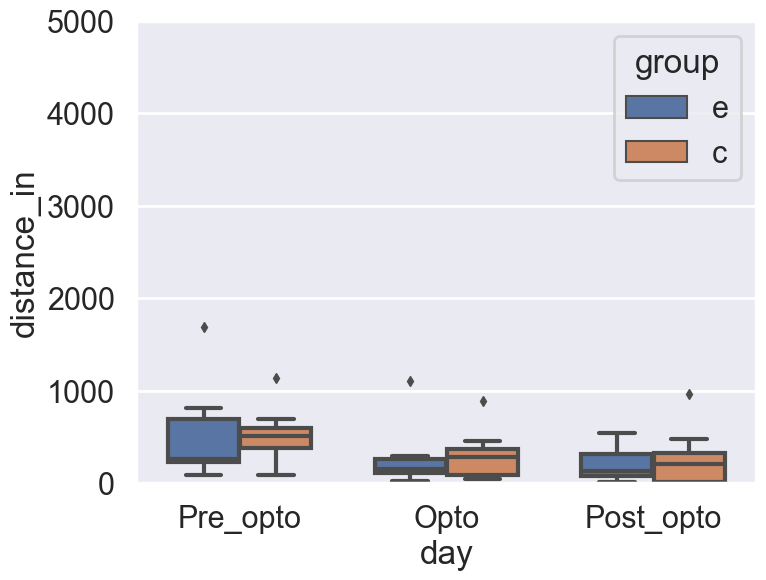

In [32]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "distance_in", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(0, 5000)
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/open_field/fig_new/in_dist.svg"
plt.savefig(save_fig_to)
plt.show()

In [130]:
#distance out
columns_of_feature =  [x for x in column_list if "_out_Dist_sum" in x]
columns_of_feature

['Pre_opto_out_Dist_sum', 'Opto_out_Dist_sum', 'Post_opto_out_Dist_sum']

In [131]:
exp_out_dist = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_out_dist_mean = [mean(x) for x in exp_out_dist]
exp_out_dist_sem = [sem(x) for x in exp_out_dist]
exp_out_dist_pre_opto, exp_out_dist_opto, exp_out_dist_post_opto = exp_out_dist[0], exp_out_dist[1], exp_out_dist[2]

control_out_dist = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_out_dist_mean = [mean(x) for x in control_out_dist]
control_out_dist_sem = [sem(x) for x in control_out_dist]
control_out_dist_pre_opto, control_out_dist_opto, control_out_dist_post_opto = control_out_dist[0], control_out_dist[1], control_out_dist[2]

flat_list_exp_out_dist = list(np.concatenate(exp_out_dist).flat)
flat_list_control_out_dist = list(np.concatenate(control_out_dist).flat)
out_dist_feature = flat_list_exp_out_dist + flat_list_control_out_dist
dv_anova["distance_out"] = out_dist_feature

In [35]:
# Pre_opto 
pt.mwu(exp_out_dist_pre_opto, control_out_dist_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,25.0,two-sided,0.863936,0.074074,0.462963


In [133]:
median(control_out_dist_pre_opto)

2084.6

In [47]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_out_dist_pre_opto,control_out_dist_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.003906,1.0,0.901235


In [48]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_out_dist_pre_opto, control_out_dist_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.003906,1.0,0.901235


In [49]:
# Opto
pt.mwu(exp_out_dist_opto, control_out_dist_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,24.0,two-sided,0.775624,0.111111,0.444444


In [135]:
median(exp_out_dist_opto)

1497.75

In [50]:
# Post_opto
pt.mwu(exp_out_dist_post_opto, control_out_dist_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,20.0,two-sided,0.455944,0.259259,0.37037


In [137]:
median(exp_out_dist_post_opto)

803.9

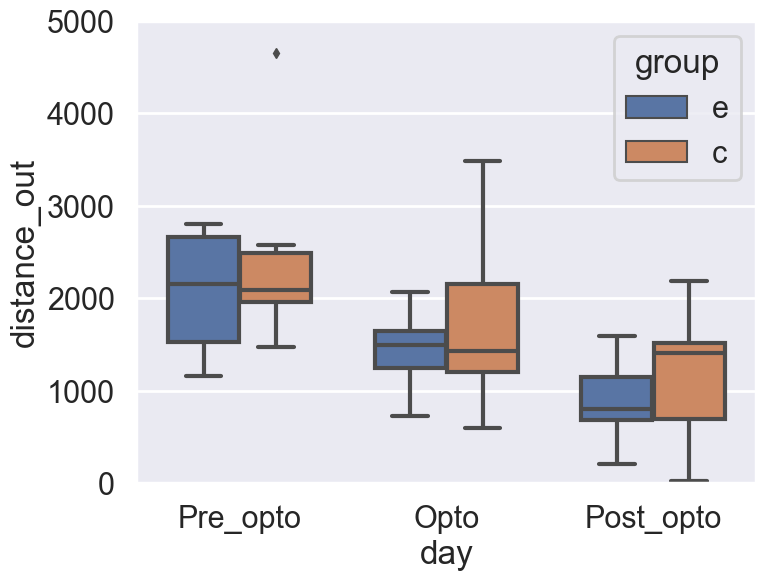

In [51]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "distance_out", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(0, 5000)
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/open_field/fig_new/out_dist.svg"
plt.savefig(save_fig_to)
plt.show()

#### Time in 

In [52]:
columns_of_feature =  [x for x in column_list if "time_in" in x]
columns_of_feature

['Pre_opto_time_in', 'Opto_time_in', ' Post_opto_time_in']

In [53]:
exp_time_in = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_time_in_mean = [mean(x) for x in exp_time_in]
exp_time_in_sem = [sem(x) for x in exp_time_in]
exp_time_in_pre_opto, exp_time_in_opto, exp_time_in_post_opto = exp_time_in[0], exp_time_in[1], exp_time_in[2]

control_time_in = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_time_in_mean = [mean(x) for x in control_time_in]
control_time_in_sem = [sem(x) for x in control_time_in]
control_time_in_pre_opto, control_time_in_opto, control_time_in_post_opto = control_time_in[0], control_time_in[1], control_time_in[2]

flat_list_exp_time_in = list(np.concatenate(exp_time_in).flat)
flat_list_control_time_in = list(np.concatenate(control_time_in).flat)
time_in_feature = flat_list_exp_time_in + flat_list_control_time_in
dv_anova["time_in"] = time_in_feature


In [54]:
# Pre_opto 
pt.mwu(exp_time_in_pre_opto, control_time_in_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,16.0,two-sided,0.215515,0.407407,0.296296


In [55]:
median(exp_time_in_pre_opto)

20.95

In [56]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_time_in_pre_opto, exp_time_in_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,9.0,two-sided,0.84375,-0.142857,0.583333


In [57]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_time_in_pre_opto, control_time_in_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,6.0,two-sided,0.054688,0.733333,0.697531


In [58]:
# Opto
pt.mwu(exp_time_in_opto, control_time_in_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,24.0,two-sided,0.775624,0.111111,0.444444


In [59]:
median(exp_time_in_opto)

11.6

In [60]:
# Post_opto
pt.mwu(exp_time_in_post_opto, control_time_in_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,28.0,two-sided,0.952969,-0.037037,0.518519


In [61]:
median(exp_time_in_post_opto)

20.75

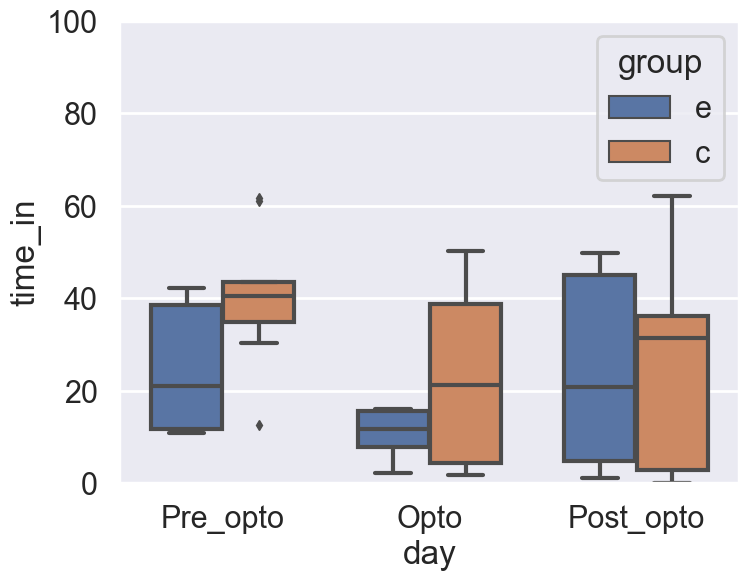

In [62]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "time_in", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(0, 100)
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/open_field/fig_new/time_in.svg"
plt.savefig(save_fig_to)
plt.show()

#### Velocity_mobility 

In [63]:
columns_of_feature =  [x for x in column_list if "total_V_Mob" in x]
columns_of_feature

['Pre_opto_total_V_Mob', 'Opto_total_V_Mob', 'Post_opto_total_V_Mob']

In [64]:
exp_mobility = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_mobility_mean = [mean(x) for x in exp_mobility]
exp_mobility_sem = [sem(x) for x in exp_mobility]
exp_mobility_pre_opto, exp_mobility_opto, exp_mobility_post_opto = exp_mobility[0], exp_mobility[1], exp_mobility[2]

control_mobility = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_mobility_mean = [mean(x) for x in control_mobility ]
control_mobility_sem = [sem(x) for x in control_mobility ]
control_mobility_pre_opto, control_mobility_opto, control_mobility_post_opto = control_mobility[0], control_mobility[1], control_mobility[2]

flat_list_exp_mobility = list(np.concatenate(exp_mobility).flat)
flat_list_control_mobility = list(np.concatenate(control_mobility).flat)
mobility_feature = flat_list_exp_mobility + flat_list_control_mobility
dv_anova["mobility"] = mobility_feature


In [65]:
# Pre_opto 
pt.mwu(exp_mobility_pre_opto, control_mobility_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,29.0,two-sided,0.863936,-0.074074,0.537037


In [66]:
median(exp_mobility_pre_opto)

19.92

In [67]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_mobility_pre_opto, exp_mobility_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,6.0,two-sided,0.4375,0.428571,0.611111


In [68]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_mobility_pre_opto, control_mobility_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,18.0,two-sided,0.652344,0.2,0.530864


In [69]:
#Opto
pt.mwu(exp_mobility_opto, control_mobility_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,20.0,two-sided,0.455944,0.259259,0.37037


In [70]:
median(exp_mobility_opto)

18.455

In [71]:
# Post_opto
pt.mwu(exp_mobility_post_opto, control_mobility_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,22.0,two-sided,0.606993,0.185185,0.407407


In [72]:
median(exp_mobility_post_opto)

18.42

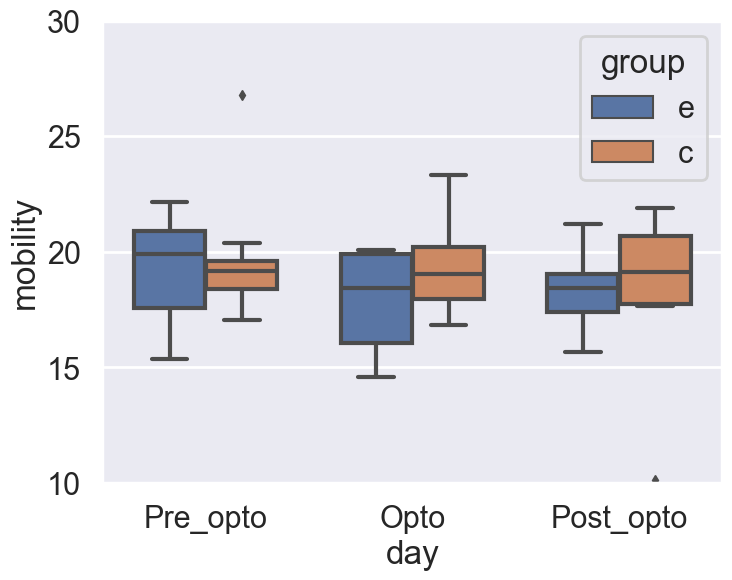

In [73]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "mobility", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(10, 30)
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/open_field/fig_new/mobility_velocity.svg"
plt.savefig(save_fig_to)
plt.show()

In [74]:
# mobility in 
columns_of_feature =  [x for x in column_list if "in_V_Mob" in x]
columns_of_feature


['Pre_opto_in_V_Mob', 'Opto_in_V_Mob', 'Post_opto_in_V_Mob']

In [75]:
exp_mobility_in = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_mobility_in_mean = [mean(x) for x in exp_mobility_in]
exp_mobility_in_sem = [sem(x) for x in exp_mobility_in]
exp_mobility_in_pre_opto, exp_mobility_in_opto, exp_mobility_in_post_opto = exp_mobility_in[0], exp_mobility_in[1], exp_mobility_in[2]

control_mobility_in = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_mobility_in_mean = [mean(x) for x in control_mobility_in]
control_mobility_in_sem = [sem(x) for x in control_mobility_in]
control_mobility_in_pre_opto, control_mobility_in_opto, control_mobility_in_post_opto = control_mobility_in[0], control_mobility_in[1], control_mobility_in[2]

flat_list_exp_mobility_in = list(np.concatenate(exp_mobility_in).flat)
flat_list_control_mobility_in = list(np.concatenate(control_mobility_in).flat)
mobility_in_feature = flat_list_exp_mobility_in + flat_list_control_mobility_in
dv_anova["mobility_in"] = mobility_in_feature


In [76]:
# Pre_opto 
pt.mwu(exp_mobility_in_pre_opto, control_mobility_in_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,31.0,two-sided,0.688911,-0.148148,0.574074


In [77]:
median(exp_mobility_in_pre_opto)

22.2

In [78]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_mobility_in_pre_opto, exp_mobility_in_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,1.0,two-sided,0.0625,0.904762,0.666667


In [79]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_mobility_in_pre_opto, control_mobility_in_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,9.0,two-sided,0.128906,0.6,0.660494


In [80]:
#Opto
pt.mwu(exp_mobility_in_opto, control_mobility_in_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,10.0,two-sided,0.04955,0.62963,0.185185


In [81]:
median(exp_mobility_in_opto)

15.4

In [82]:
# Post_opto
pt.mwu(exp_mobility_in_post_opto, control_mobility_in_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,26.0,two-sided,0.954645,0.037037,0.481481


In [83]:
median(exp_mobility_in_post_opto)

16.9

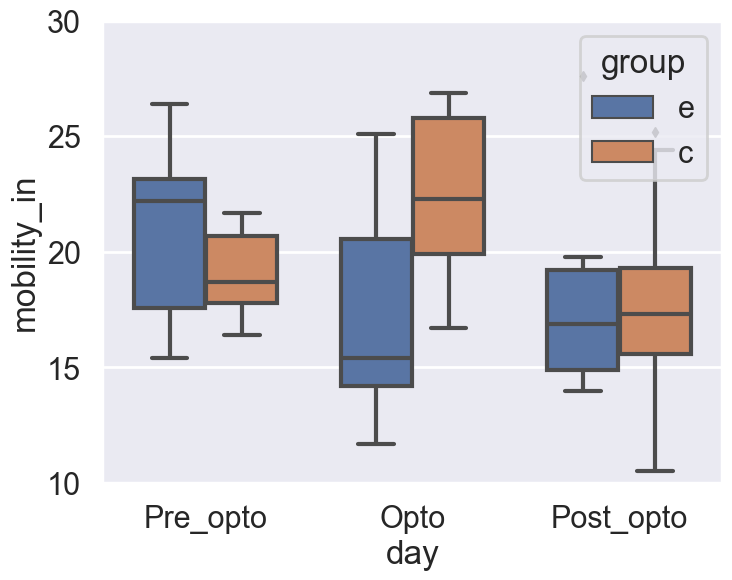

In [84]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "mobility_in", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(10, 30)
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/open_field/fig_new/mobility_velocity_in.svg"
plt.savefig(save_fig_to)
plt.show()

In [141]:
# mobility out
columns_of_feature =  [x for x in column_list if "out_V_Mob" in x]
columns_of_feature

['Pre_opto_out_V_Mob', 'Opto_out_V_Mob', 'Post_opto_out_V_Mob']

In [142]:
exp_mobility_out = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_mobility_out_mean = [mean(x) for x in exp_mobility_out]
exp_mobility_out_sem = [sem(x) for x in exp_mobility_out]
exp_mobility_out_pre_opto, exp_mobility_out_opto, exp_mobility_out_post_opto = exp_mobility_out[0], exp_mobility_out[1], exp_mobility_out[2]

control_mobility_out = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_mobility_out_mean = [mean(x) for x in control_mobility_out]
control_mobility_out_sem = [sem(x) for x in control_mobility_out]
control_mobility_out_pre_opto, control_mobility_out_opto, control_mobility_out_post_opto = control_mobility_out[0], control_mobility_out[1], control_mobility_out[2]

flat_list_exp_mobility_out = list(np.concatenate(exp_mobility_out).flat)
flat_list_control_mobility_out = list(np.concatenate(control_mobility_out).flat)
mobility_out_feature = flat_list_exp_mobility_out + flat_list_control_mobility_out
dv_anova["mobility_out"] = mobility_out_feature

In [87]:
# Pre_opto 
pt.mwu(exp_mobility_out_pre_opto, control_mobility_out_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,23.0,two-sided,0.688911,0.148148,0.425926


In [144]:
median(exp_mobility_out_pre_opto)

18.4

In [145]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_mobility_out_pre_opto, control_mobility_out_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,19.0,two-sided,0.734375,0.155556,0.537037


In [146]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_mobility_out_pre_opto, exp_mobility_out_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,8.0,two-sided,0.6875,0.238095,0.527778


In [147]:
#Opto
pt.mwu(exp_mobility_out_opto, control_mobility_out_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,20.0,two-sided,0.455944,0.259259,0.37037


In [150]:
median(control_mobility_out_opto)

18.4

In [91]:
# Post_opto
pt.mwu(exp_mobility_out_post_opto, control_mobility_out_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,23.5,two-sided,0.722961,0.12963,0.435185


In [152]:
median(exp_mobility_out_post_opto)

18.3

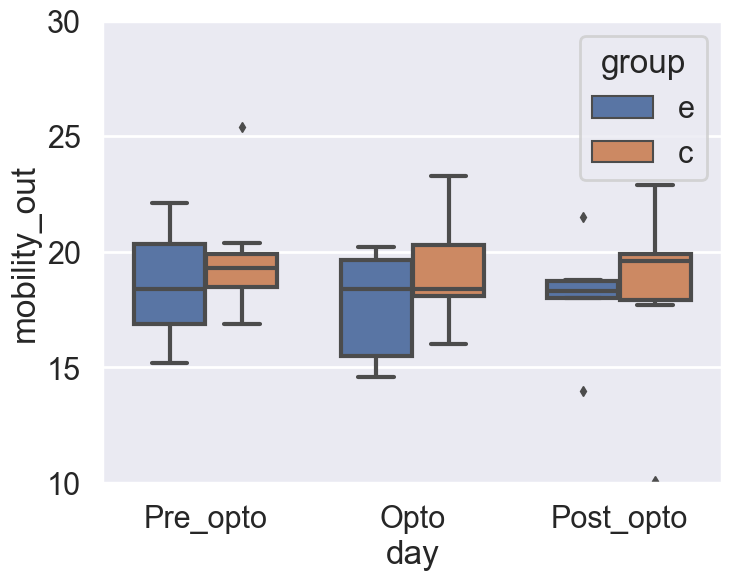

In [92]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "mobility_out", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(10, 30)
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/open_field/fig_new/mobility_velocity_out.svg"
plt.savefig(save_fig_to)
plt.show()

#### Mobility time

In [93]:
# mobility total time
columns_of_feature =  [x for x in column_list if "total_Mob" in x]
columns_of_feature


['Pre_opto_total_Mob', 'Opto_total_Mob', 'Post_opto_total_Mob']

In [94]:
exp_mobility_total_time = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_mobilit_total_time_mean = [mean(x) for x in exp_mobility_total_time]
exp_mobility_total_time_sem = [sem(x) for x in exp_mobility_total_time]
exp_mobility_total_time_pre_opto, exp_mobility_total_time_opto, exp_mobility_total_time_post_opto = exp_mobility_total_time[0], exp_mobility_total_time[1], exp_mobility_total_time[2]

control_mobility_total_time = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_mobility_total_time_mean = [mean(x) for x in control_mobility_total_time]
control_mobility_total_time_sem = [sem(x) for x in control_mobility_total_time]
control_mobility_total_time_pre_opto, control_mobility_total_time_opto, control_mobility_total_time_post_opto = control_mobility_total_time[0], control_mobility_total_time[1], control_mobility_total_time[2]

flat_list_exp_mobility_total_time = list(np.concatenate(exp_mobility_total_time).flat)
flat_list_control_mobility_total_time = list(np.concatenate(control_mobility_total_time).flat)
mobility_total_time_feature = flat_list_exp_mobility_total_time + flat_list_control_mobility_total_time
dv_anova["mobility_total_time"] = mobility_total_time_feature

In [95]:
# Pre_opto 
pt.mwu(exp_mobility_total_time_pre_opto, control_mobility_total_time_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,25.0,two-sided,0.863936,0.074074,0.462963


In [96]:
median(exp_mobility_total_time_pre_opto)

140.85500000000002

In [97]:
#Pre_opto vs Post_opto
pt.wilcoxon(exp_mobility_total_time_pre_opto, exp_mobility_total_time_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,1.0,two-sided,0.0625,0.904762,0.944444


In [98]:
#Pre_opto vs Post_opto
pt.wilcoxon(control_mobility_total_time_pre_opto, control_mobility_total_time_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.003906,1.0,0.91358


In [99]:
#Opto
pt.mwu(exp_mobility_out_opto, control_mobility_total_time_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,0.0,two-sided,0.0004,1.0,0.0


In [100]:
median(exp_mobility_total_time_opto)

101.21000000000001

In [101]:
# Post_opto
pt.mwu(exp_mobility_total_time_post_opto, control_mobility_total_time_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,20.0,two-sided,0.455944,0.259259,0.37037


In [102]:
median(exp_mobility_total_time_post_opto)

51.120000000000005

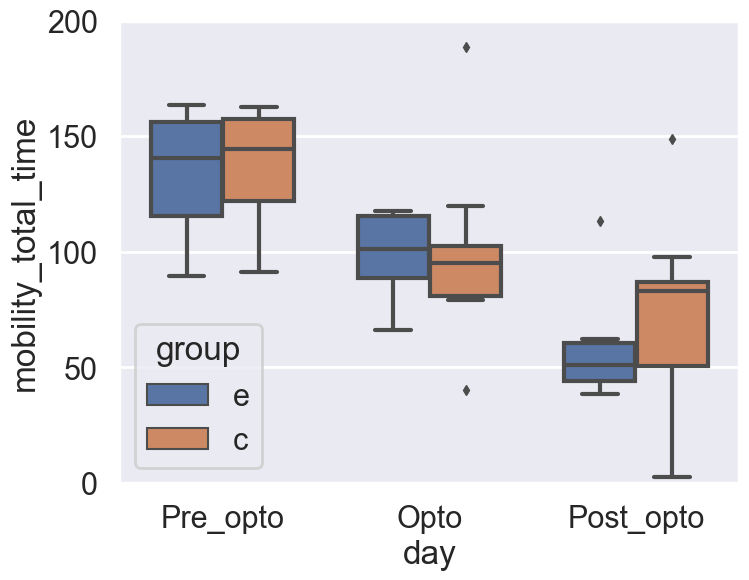

In [103]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "mobility_total_time", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(0, 200)
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/open_field/fig_new/mobility_velocity_time_total.svg"
plt.savefig(save_fig_to)
plt.show()

In [104]:
# mobility in time
columns_of_feature =  [x for x in column_list if "in_Mob" in x]
columns_of_feature

['Pre_opto_in_Mob', 'Opto_in_Mob', 'Post_opto_in_Mob']

In [105]:
exp_mobility_in_time = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_mobilit_in_time_mean = [mean(x) for x in exp_mobility_in_time]
exp_mobility_in_time_sem = [sem(x) for x in exp_mobility_in_time]
exp_mobility_in_time_pre_opto, exp_mobility_in_time_opto, exp_mobility_in_time_post_opto = exp_mobility_in_time[0], exp_mobility_in_time[1], exp_mobility_in_time[2]

control_mobility_in_time = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_mobility_in_time_mean = [mean(x) for x in control_mobility_in_time]
control_mobility_in_time_sem = [sem(x) for x in control_mobility_in_time]
control_mobility_in_time_pre_opto, control_mobility_in_time_opto, control_mobility_in_time_post_opto = control_mobility_in_time[0], control_mobility_in_time[1], control_mobility_in_time[2]

flat_list_exp_mobility_in_time = list(np.concatenate(exp_mobility_in_time).flat)
flat_list_control_mobility_in_time = list(np.concatenate(control_mobility_in_time).flat)
mobility_in_time_feature = flat_list_exp_mobility_in_time + flat_list_control_mobility_in_time
dv_anova["mobility_in_time"] = mobility_in_time_feature

In [106]:
# Pre_opto 
pt.mwu(exp_mobility_in_time_pre_opto, control_mobility_in_time_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,18.0,two-sided,0.327672,0.333333,0.333333


In [107]:
median(exp_mobility_in_time_pre_opto)

13.4

In [108]:
#Pre_opto vs Post_opto
pt.wilcoxon(exp_mobility_in_time_pre_opto, exp_mobility_in_time_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,4.0,two-sided,0.21875,0.619048,0.722222


In [109]:
#Pre_opto vs Post_opto
pt.wilcoxon(control_mobility_in_time_pre_opto, control_mobility_in_time_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,2.0,two-sided,0.011719,0.911111,0.802469


In [110]:
#Opto
pt.mwu(exp_mobility_in_time_opto, control_mobility_in_time_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,25.0,two-sided,0.863936,0.074074,0.462963


In [111]:
median(exp_mobility_in_time_opto)

8.5

In [112]:
# Post_opto
pt.mwu(exp_mobility_in_time_post_opto, control_mobility_in_time_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,28.0,two-sided,0.952969,-0.037037,0.518519


In [113]:
median(exp_mobility_in_time_post_opto)

6.75

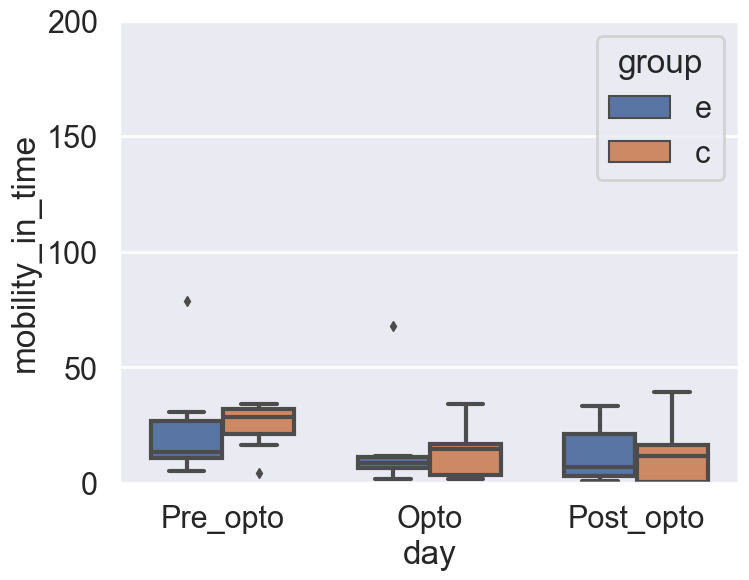

In [114]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "mobility_in_time", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(0, 200)
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/open_field/fig_new/mobility_velocity_time_in.svg"

plt.savefig(save_fig_to)
plt.show()

In [153]:
# mobility out time
columns_of_feature =  [x for x in column_list if "out_Mob" in x]
columns_of_feature


['Pre_opto_out_Mob', 'Opto_out_Mob', 'Post_opto_out_Mob']

In [154]:
exp_mobility_out_time = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_mobilit_out_time_mean = [mean(x) for x in exp_mobility_out_time]
exp_mobility_out_time_sem = [sem(x) for x in exp_mobility_out_time]
exp_mobility_out_time_pre_opto, exp_mobility_out_time_opto, exp_mobility_out_time_post_opto = exp_mobility_out_time[0], exp_mobility_out_time[1], exp_mobility_out_time[2]

control_mobility_out_time = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_mobility_out_time_mean = [mean(x) for x in control_mobility_out_time]
control_mobility_out_time_sem = [sem(x) for x in control_mobility_out_time]
control_mobility_out_time_pre_opto, control_mobility_out_time_opto, control_mobility_out_time_post_opto = control_mobility_out_time[0], control_mobility_out_time[1], control_mobility_out_time[2]

flat_list_exp_mobility_out_time = list(np.concatenate(exp_mobility_out_time).flat)
flat_list_control_mobility_out_time = list(np.concatenate(control_mobility_out_time).flat)
mobility_out_time_feature = flat_list_exp_mobility_out_time + flat_list_control_mobility_out_time
dv_anova["mobility_out_time"] = mobility_out_time_feature

In [159]:
# Pre_opto 
pt.mwu(exp_mobility_out_time_pre_opto,control_mobility_out_time_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,24.0,two-sided,0.775624,0.111111,0.444444


In [161]:
median(exp_mobility_out_time_pre_opto)

113.55

In [156]:
#Pre_opto vs Post_opto
pt.wilcoxon(control_mobility_out_time_pre_opto,control_mobility_out_time_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.003906,1.0,0.938272


In [157]:
#Pre_opto vs Post_opto
pt.wilcoxon(exp_mobility_out_time_pre_opto, exp_mobility_in_time_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.03125,1.0,1.0


In [162]:
# Opto
pt.mwu(exp_mobility_out_time_opto, control_mobility_out_time_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,24.0,two-sided,0.775624,0.111111,0.444444


In [165]:
median(exp_mobility_out_time_opto)

85.0

In [158]:
# Post_opto
pt.mwu(exp_mobility_out_time_post_opto, control_mobility_out_time_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,20.0,two-sided,0.455944,0.259259,0.37037


In [167]:
median(exp_mobility_out_time_post_opto)

43.7

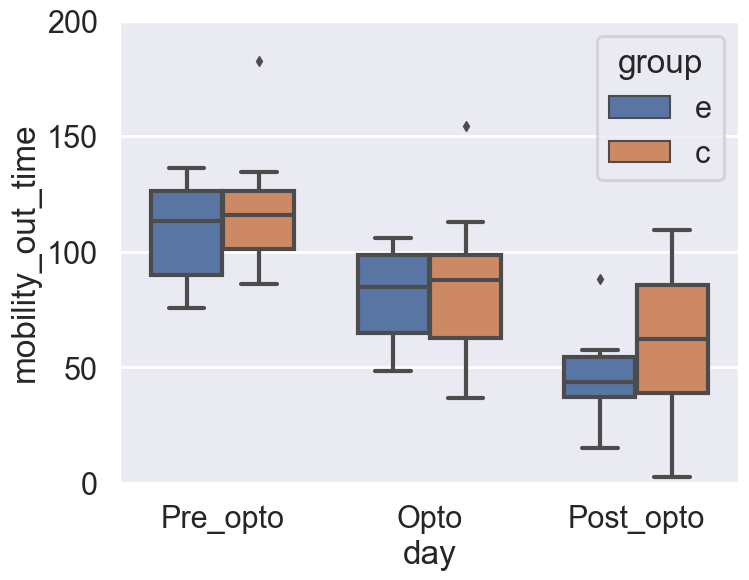

In [121]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "mobility_out_time", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(0, 200)
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/open_field/fig_new/mobility_velocity_time_out.svg"

plt.savefig(save_fig_to)
plt.show()

#### N epi mob

In [122]:

columns_of_feature =  [x for x in column_list if "N_epi_Mob" in x]
columns_of_feature


['Pre_opto_N_epi_Mob', 'Opto_N_epi_Mob', 'Post_opto_N_epi_Mob']

In [123]:
exp_N_epi_Mob = [df.loc[df["grupa"] == "e", x].tolist() for x in columns_of_feature]
exp_N_epi_Mob_mean = [mean(x) for x in exp_N_epi_Mob]
exp_N_epi_Mob_sem = [sem(x) for x in exp_N_epi_Mob]
exp_N_epi_Mob_pre_opto, exp_N_epi_Mob_opto, exp_N_epi_Mob_post_opto = exp_N_epi_Mob[0], exp_N_epi_Mob[1], exp_N_epi_Mob[2]

control_N_epi_Mob = [df.loc[df["grupa"] == "c", x].tolist() for x in columns_of_feature]
control_N_epi_Mob_mean = [mean(x) for x in control_N_epi_Mob]
control_N_epi_Mob_sem = [sem(x) for x in control_N_epi_Mob]
control_N_epi_Mob_pre_opto, control_N_epi_Mob_opto, control_N_epi_Mob_post_opto = control_N_epi_Mob[0], control_N_epi_Mob[1], control_N_epi_Mob[2]

flat_list_exp_N_epi_Mob = list(np.concatenate(exp_N_epi_Mob).flat)
flat_list_control_N_epi_Mob = list(np.concatenate(control_N_epi_Mob).flat)
N_epi_Mob_feature = flat_list_exp_N_epi_Mob + flat_list_control_N_epi_Mob
dv_anova["N_epi_Mob"] = N_epi_Mob_feature

In [124]:
pt.mixed_anova(data=dv_anova, dv="N_epi_Mob", between="group", within="day", subject='subject')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,group,282.133333,1,13,282.133333,0.492181,0.495324,0.036479,NaN
1,day,4552.133333,2,26,2276.066667,15.999748,0.000030,0.551720,0.929871
2,Interaction,105.866667,2,26,52.933333,0.372098,0.692898,0.027826,NaN


C:\Users\gniew\AppData\Local\Temp\ipykernel_20448\3167990136.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


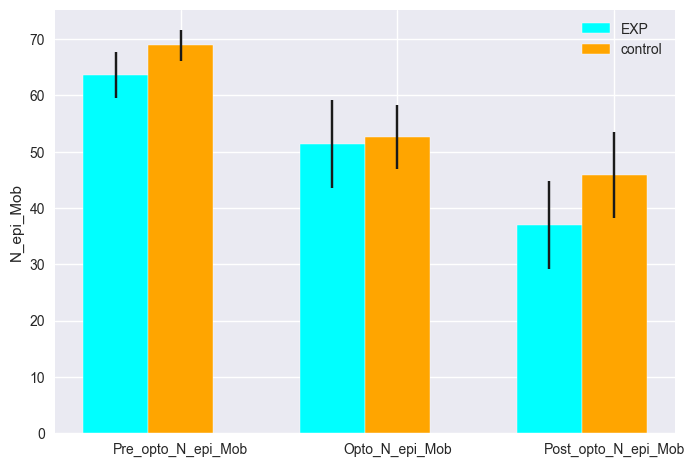

In [125]:
#  Graph
plt.style.use("seaborn")
x = np.arange(3)
width = 0.3
plt.bar(x -0.3, exp_N_epi_Mob_mean, width, color='cyan', yerr = exp_N_epi_Mob_sem)
plt.bar(x, control_N_epi_Mob_mean, width, color='orange', yerr = control_N_epi_Mob_sem)

plt.xticks(x, columns_of_feature)
plt.ylabel("N_epi_Mob")
plt.legend(["EXP", "control"])
save_fig_to = "C:/Users/gniew/Desktop/PRACA/doktorat/behawior/open_field/fig_new/N_epi_Mob.svg"
plt.savefig(save_fig_to)
plt.show()

In [126]:
statistic_df = pd.DataFrame(columns = ["statistic", "p-value", "group", "statistic_test", "feature"])

for h, i in enumerate(pre_opto):
    normality = list(set(check_noramlity.loc[check_noramlity["feature"] == i, "normal"].values))
    if False in normality:
        result = list(ranksums(df.loc[df["grupa"] == "e", i], df.loc[df["grupa"] == "c", i]))
        result.append("pre_opto")
        result.append("The Wilcoxon rank-sum test")
        result.append(i)
        statistic_df.loc[h] = result
    else:
        result = list(ttest_ind(df.loc[df["grupa"] == "e", i], df.loc[df["grupa"] == "c", i]))
        result.append("pre_opto")
        result.append("T-test for the means of two independent samples of scores")
        result.append(i)
        statistic_df.loc[h] = result

In [127]:
for h, i in enumerate(opto):
    normality = list(set(check_noramlity.loc[check_noramlity["feature"] == i, "normal"].values))
    if False in normality:
        result = list(ranksums(df.loc[df["grupa"] == "e", i], df.loc[df["grupa"] == "c", i]))
        result.append("opto")
        result.append("The Wilcoxon rank-sum test")
        result.append(i)
        statistic_df.loc[len(statistic_df)] = result
    else:
        result = list(ttest_ind(df.loc[df["grupa"] == "e", i], df.loc[df["grupa"] == "c", i]))
        result.append("opto")
        result.append("T-test for the means of two independent samples of scores")
        result.append(i)
        statistic_df.loc[len(statistic_df)] = result

In [128]:
for h, i in enumerate(post_opto):
    normality = list(set(check_noramlity.loc[check_noramlity["feature"] == i, "normal"].values))
    if False in normality:
        result = list(ranksums(df.loc[df["grupa"] == "e", i], df.loc[df["grupa"] == "c", i]))
        result.append("post_opto")
        result.append("The Wilcoxon rank-sum test")
        result.append(i)
        statistic_df.loc[len(statistic_df)] = result
    else:
        result = list(ttest_ind(df.loc[df["grupa"] == "e", i], df.loc[df["grupa"] == "c", i]))
        result.append("post_opto")
        result.append("T-test for the means of two independent samples of scores")
        result.append(i)
        statistic_df.loc[len(statistic_df)] = result

In [129]:
statistic_df.head(48)

,statistic,p-value,group,statistic_test,feature
0,-1.296362,0.194851,pre_opto,The Wilcoxon rank-sum test,Pre_opto_time_in
1,1.649916,0.098960,pre_opto,The Wilcoxon rank-sum test,Pre_opto_time_out
2,0.793886,0.441513,pre_opto,T-test for the means of two independent sample...,Pre_opto_total_Immob
3,-1.296362,0.194851,pre_opto,The Wilcoxon rank-sum test,Pre_opto_in_Immob
4,0.635781,0.535951,pre_opto,T-test for the means of two independent sample...,Pre_opto_out_Immob
5,-0.542625,0.596569,pre_opto,T-test for the means of two independent sample...,Pre_opto_total_Mob
6,-1.060660,0.288844,pre_opto,The Wilcoxon rank-sum test,Pre_opto_in_Mob
7,-0.635890,0.535883,pre_opto,T-test for the means of two independent sample...,Pre_opto_out_Mob
8,0.471405,0.637352,pre_opto,The Wilcoxon rank-sum test,Pre_opto_total_Dist_sum
9,-0.824958,0.409395,pre_opto,The Wilcoxon rank-sum test,Pre_opto_in_Dist_sum


In [73]:
save_to = "C://Users//gniew//Desktop//PRACA//doktorat//behawior"
statistic_df.to_excel(save_to + "//" + "statistic_tests" + ".xlsx")
check_noramlity.to_excel(save_to + "//" +  "normality_tests" + ".xlsx")

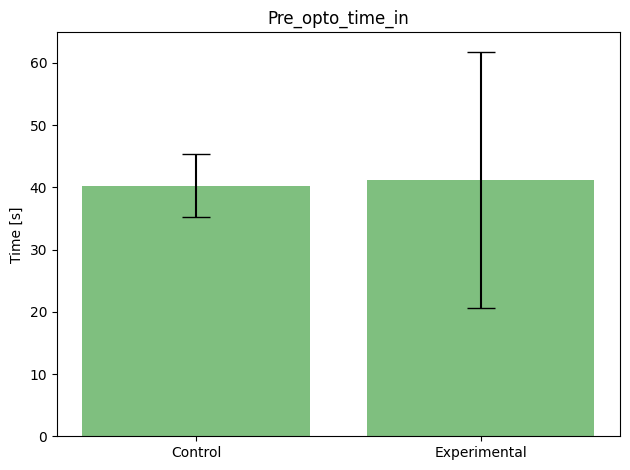

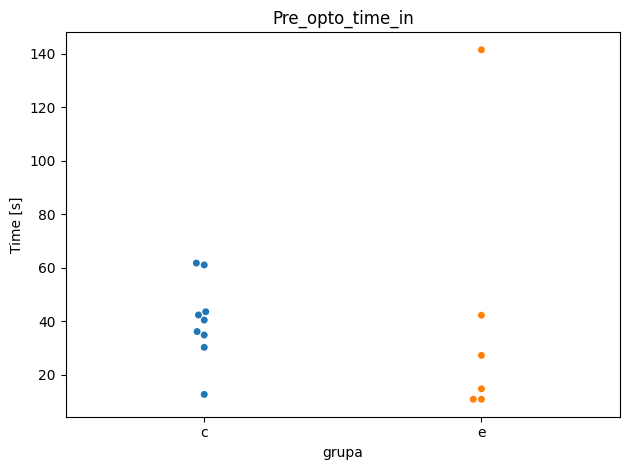

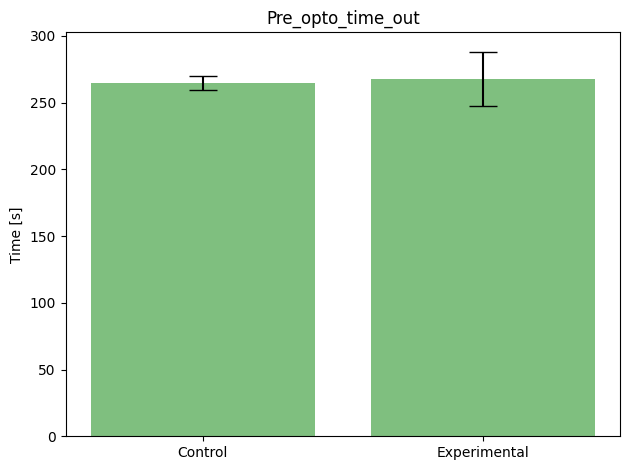

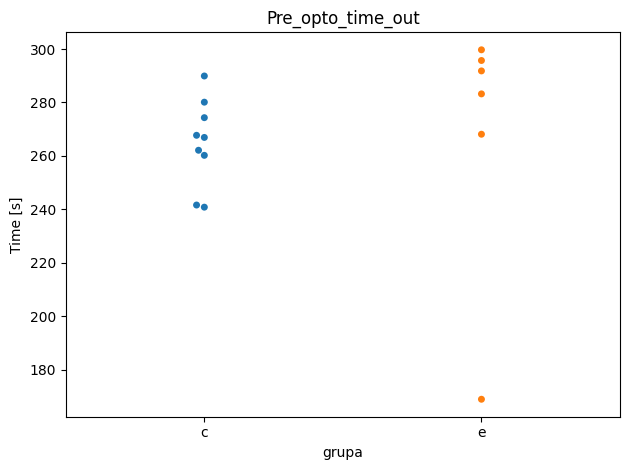

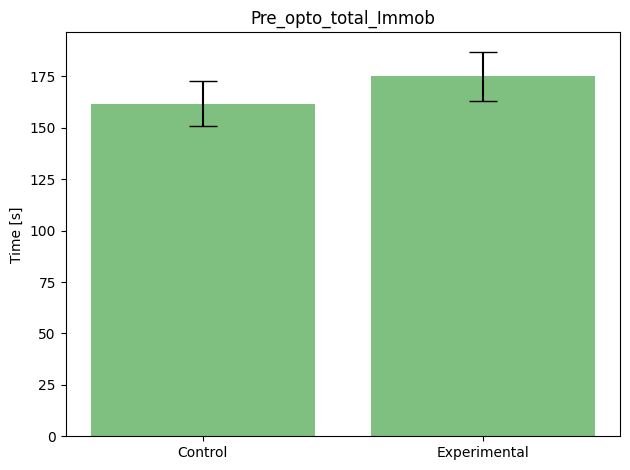

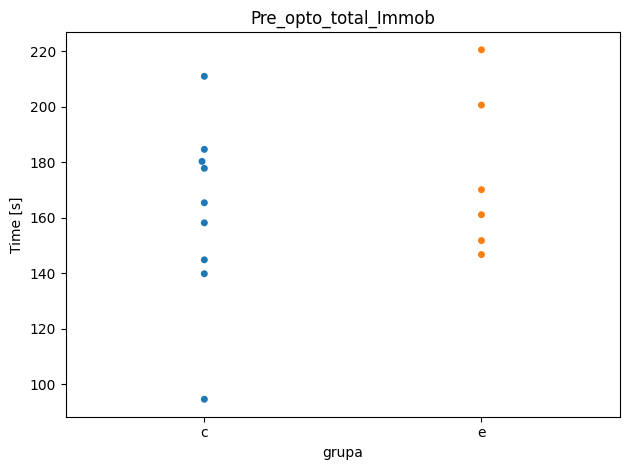

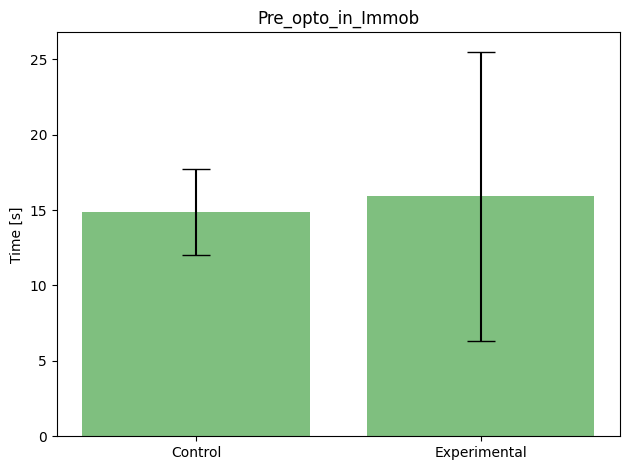

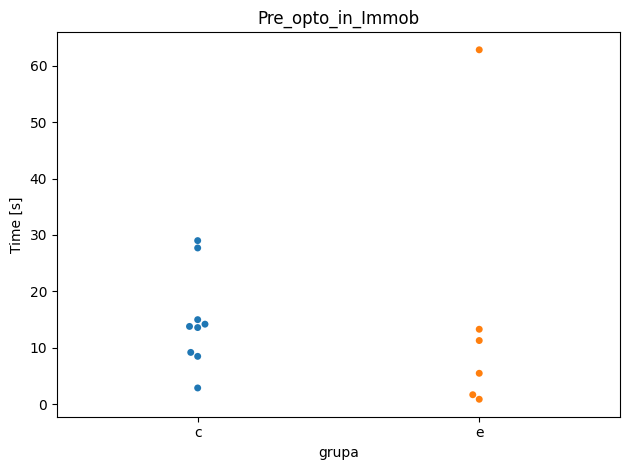

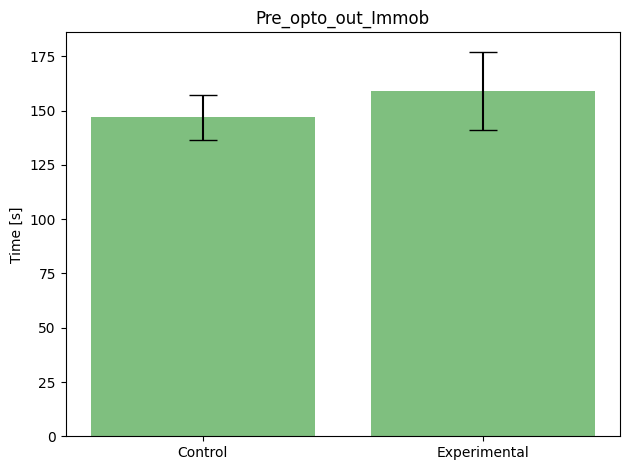

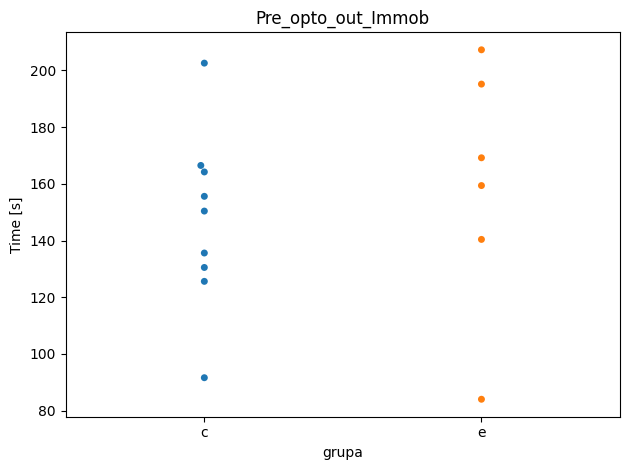

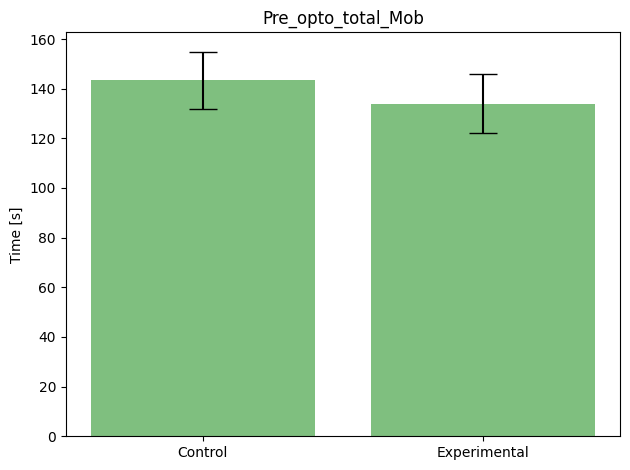

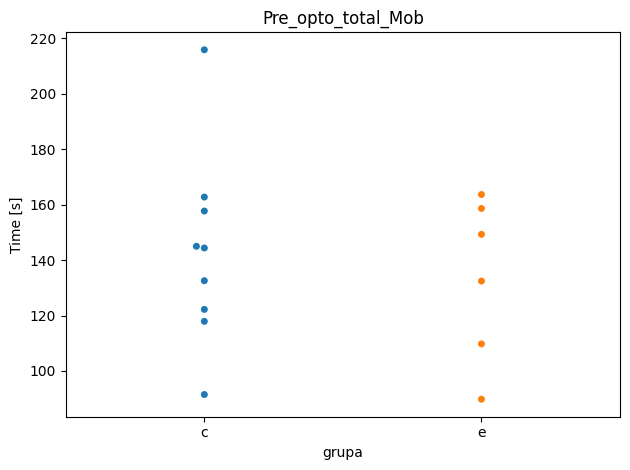

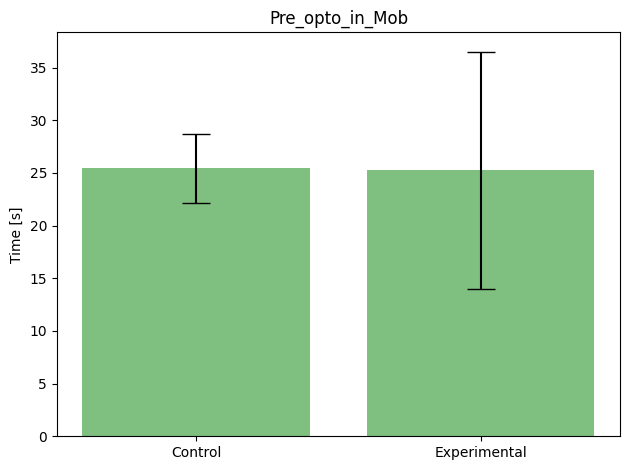

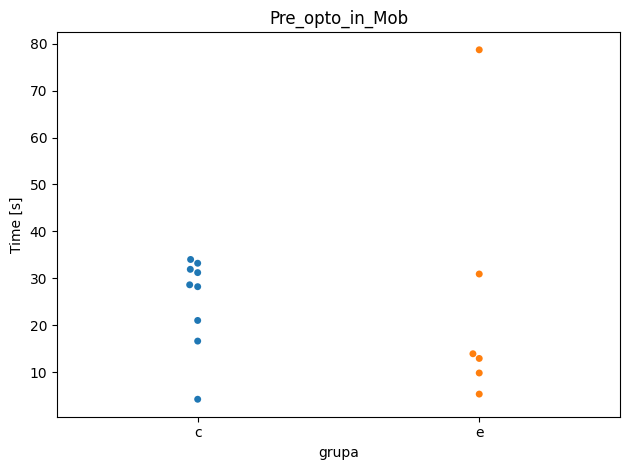

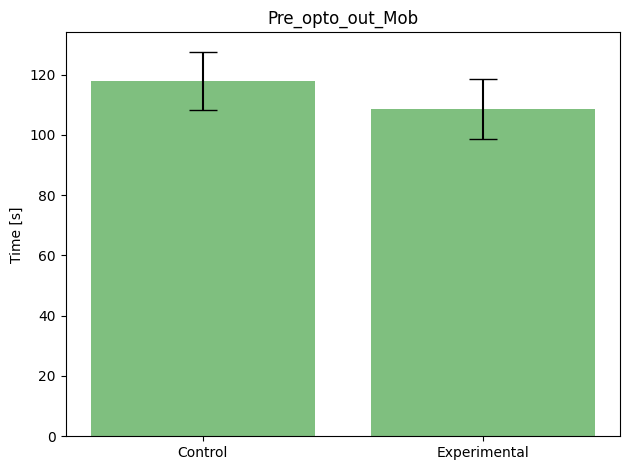

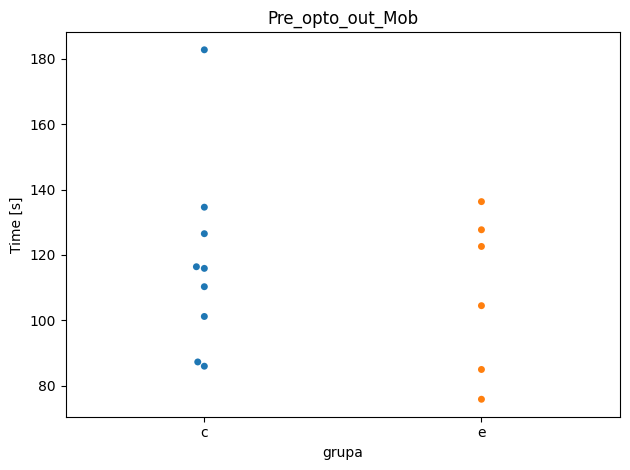

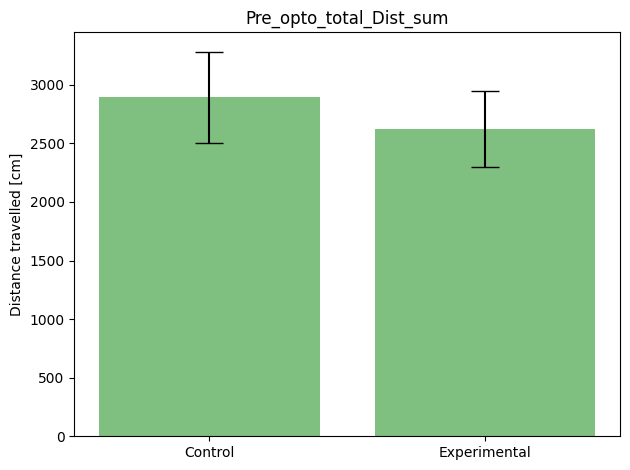

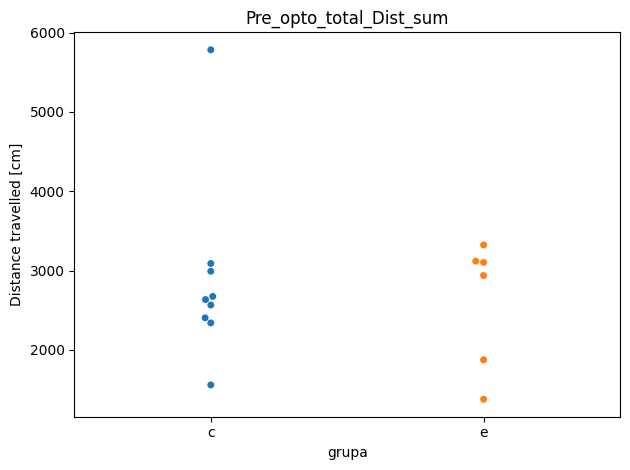

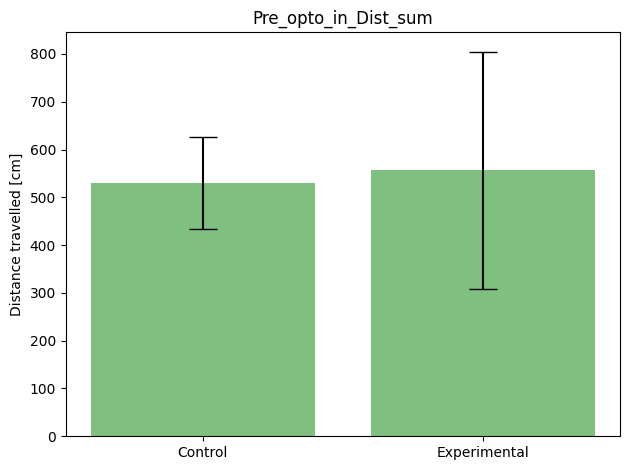

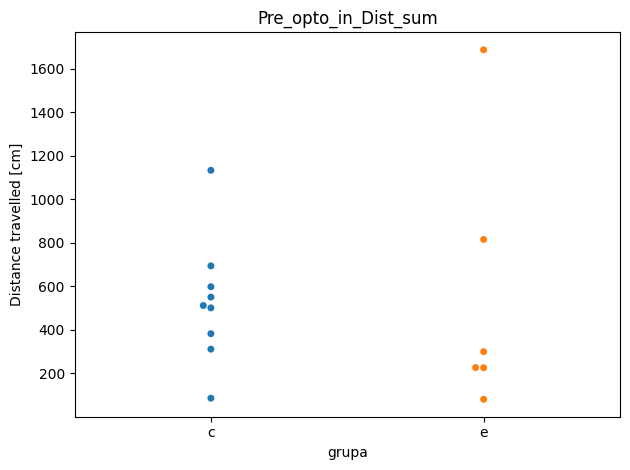

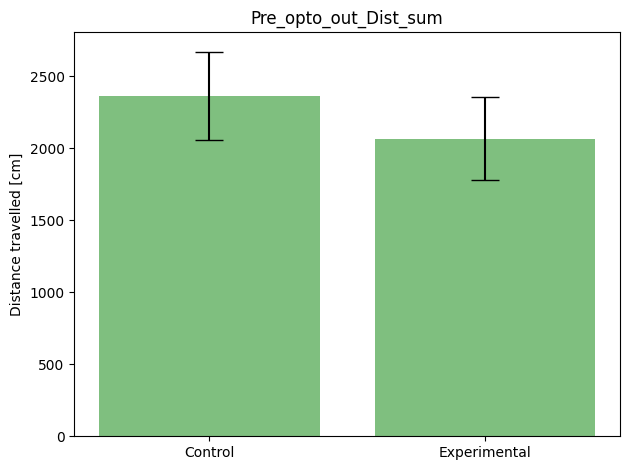

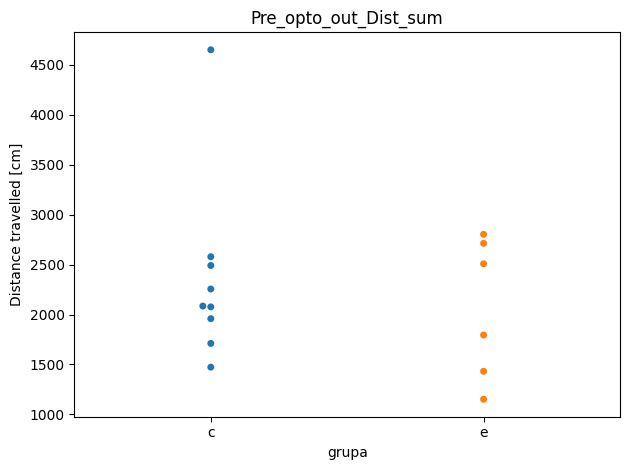

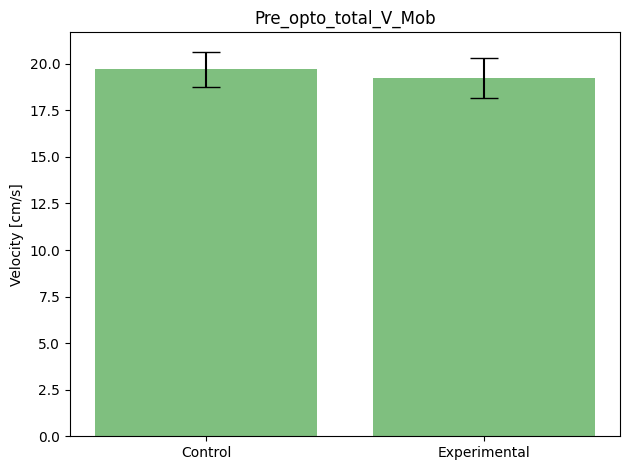

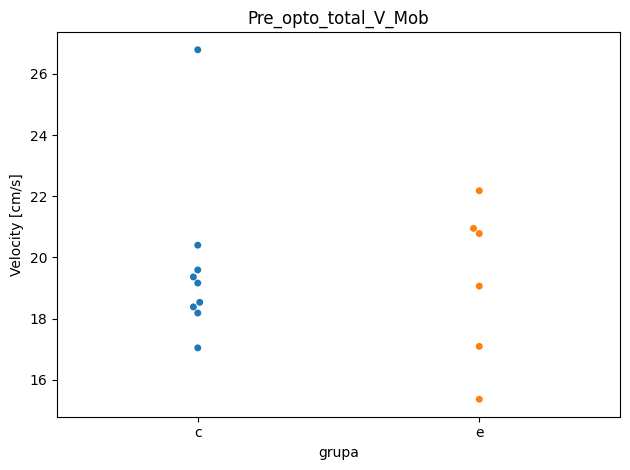

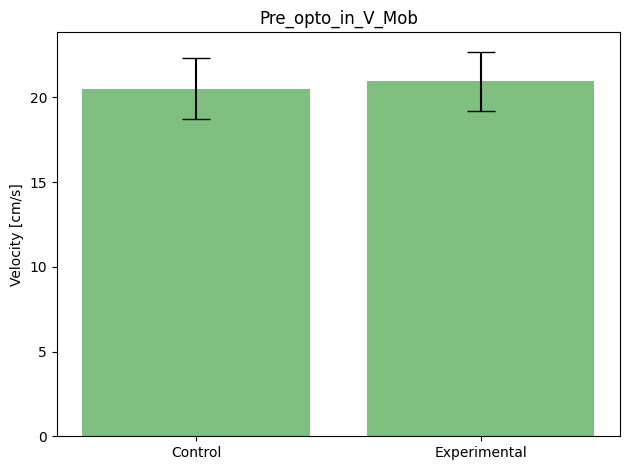

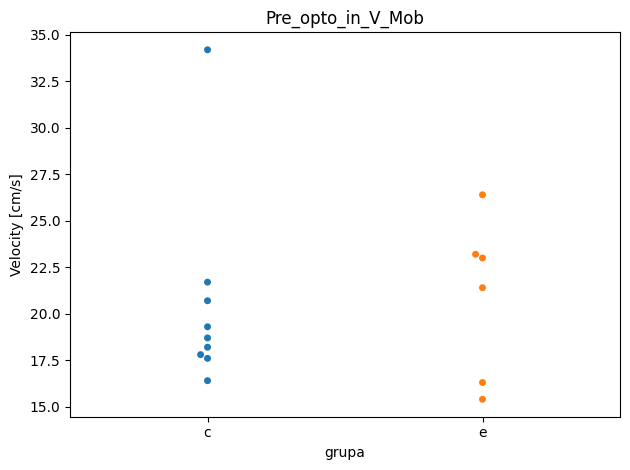

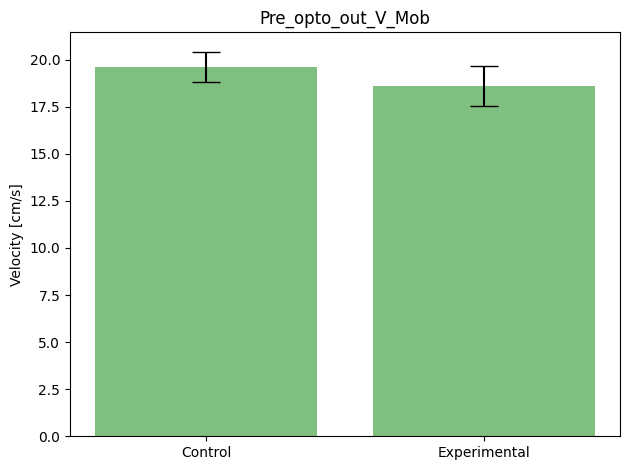

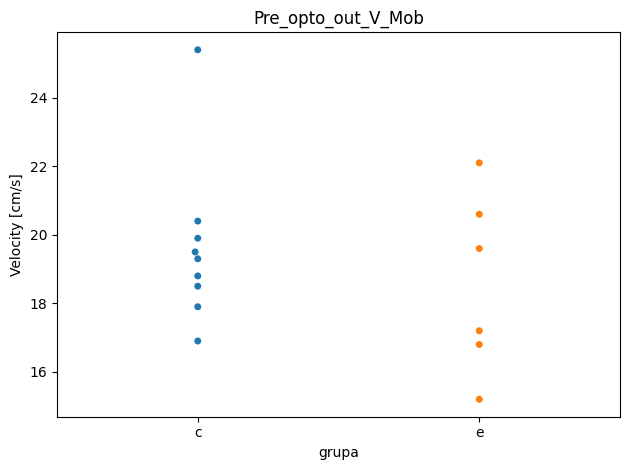

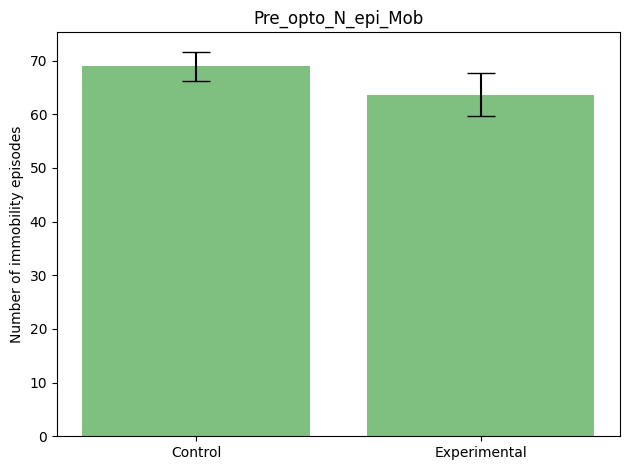

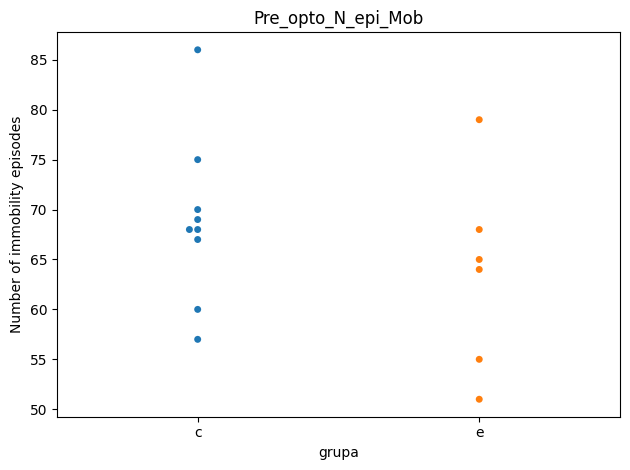

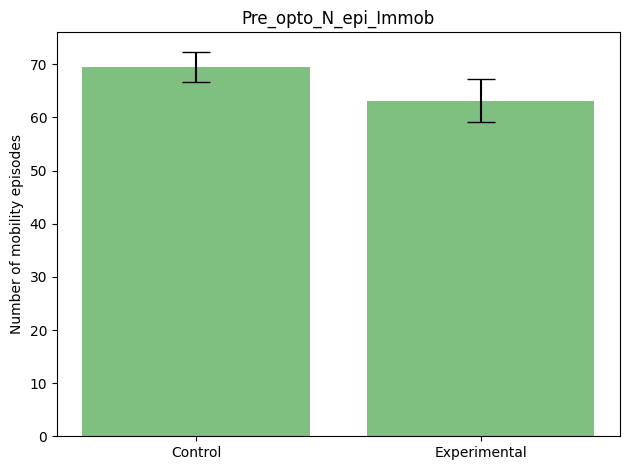

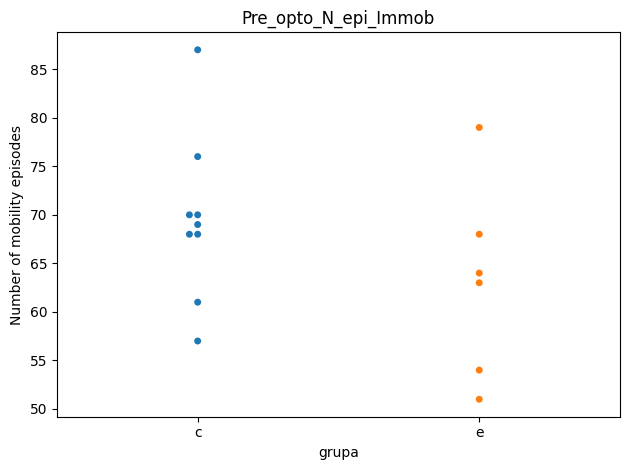

In [81]:
y_title_list = ["Time [s]", "Time [s]", "Time [s]", "Time [s]", "Time [s]", "Time [s]", "Time [s]", "Time [s]", "Distance travelled [cm]", "Distance travelled [cm]", "Distance travelled [cm]", "Velocity [cm/s]", "Velocity [cm/s]", "Velocity [cm/s]", "Number of immobility episodes", "Number of mobility episodes"]
save_to = "C://Users//gniew//Desktop//PRACA//doktorat//behawior//pre_opto_fig"
for h, i in enumerate(pre_opto):
    fig, ax = plt.subplots()
    
    mean_exp = df.loc[df["grupa"] == "e", i].mean()
    mean_ctrl = df.loc[df["grupa"] == "c", i].mean()
    sem_exp = sem(df.loc[df["grupa"] == "e", i])
    sem_ctrl = sem(df.loc[df["grupa"] == "c", i])
    
    x_pos = [1,2]
    groups = ["Control", "Experimental"]
    y_pos = [mean_ctrl, mean_exp]
    error_sem = [sem_ctrl, sem_exp]
    
    ax.bar(x_pos, y_pos, yerr=error_sem, align='center', alpha=0.5, ecolor='black', capsize=10, color = "green")
    ax.set_ylabel(y_title_list[h])
    ax.set_xticks(x_pos)
    ax.set_xticklabels(groups)
    ax.set_title(i)
    plt.tight_layout()
    plt.savefig(save_to + "//" + f"barplot_{i}" + ".svg")
    plt.show()
    sns.swarmplot(data=df, x="grupa", y=i).set(title=i, ylabel= y_title_list[h])
    plt.tight_layout()
    plt.savefig(save_to + "//" + f"swarmplot_{i}" + ".svg")

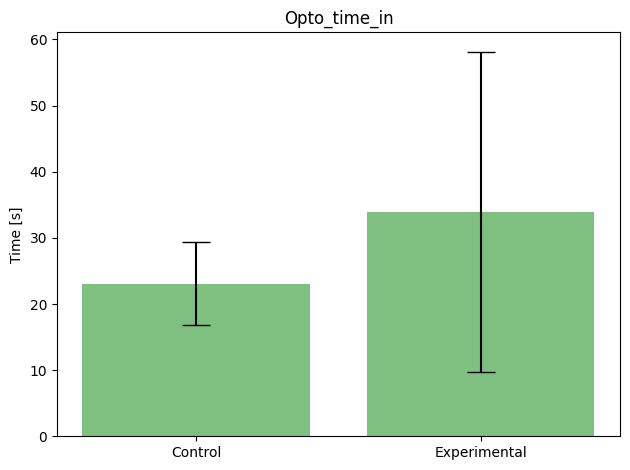

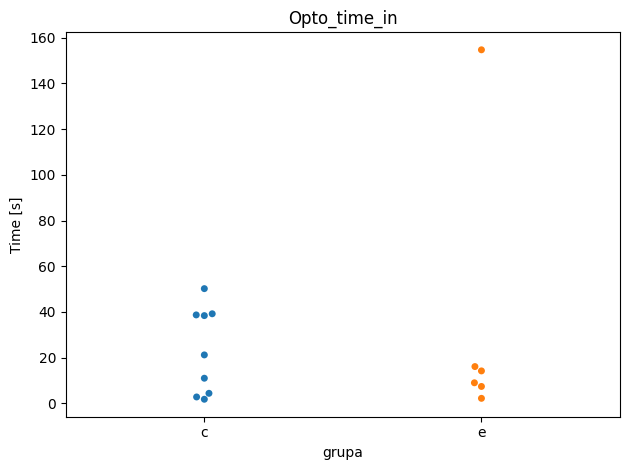

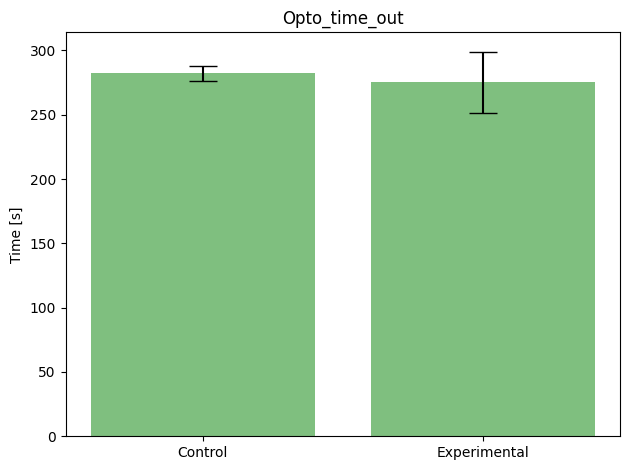

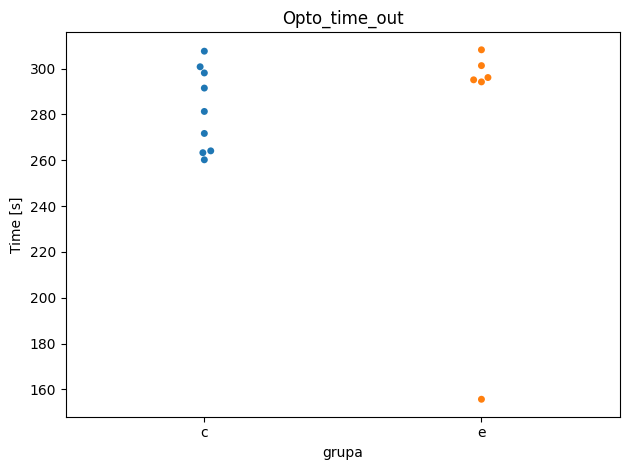

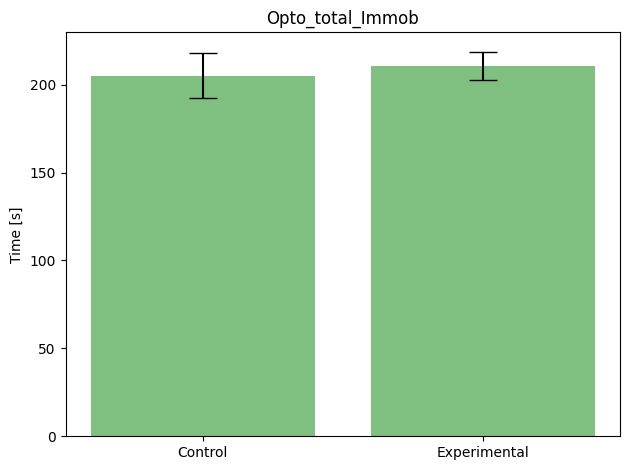

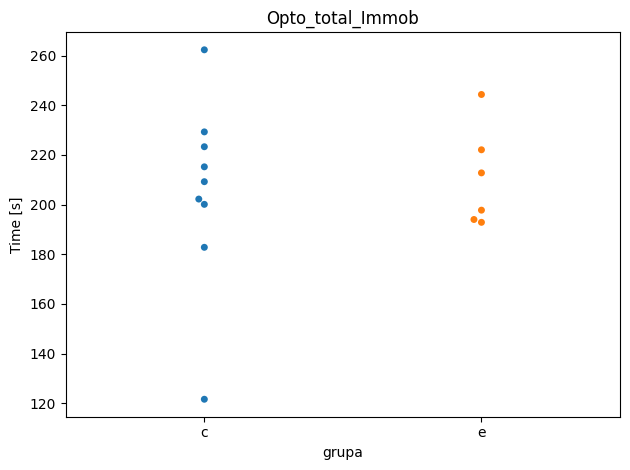

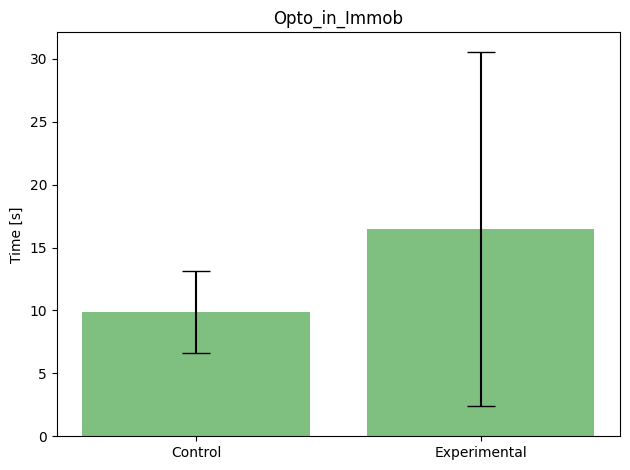

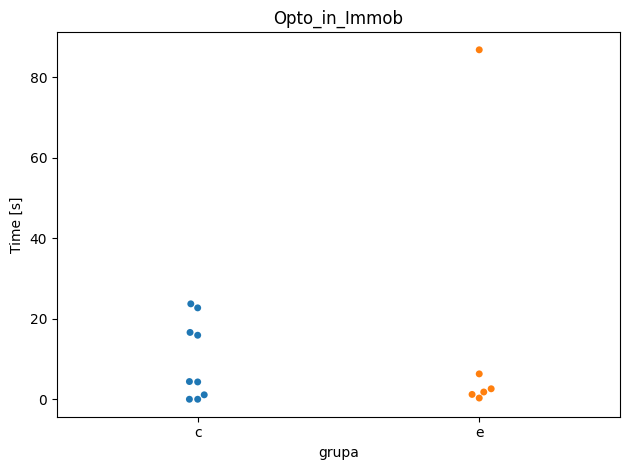

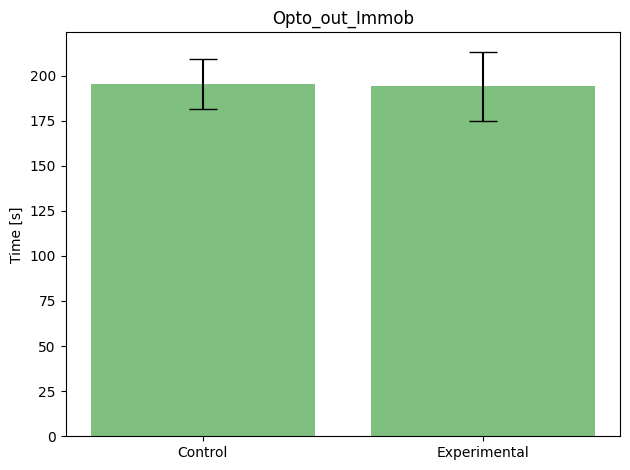

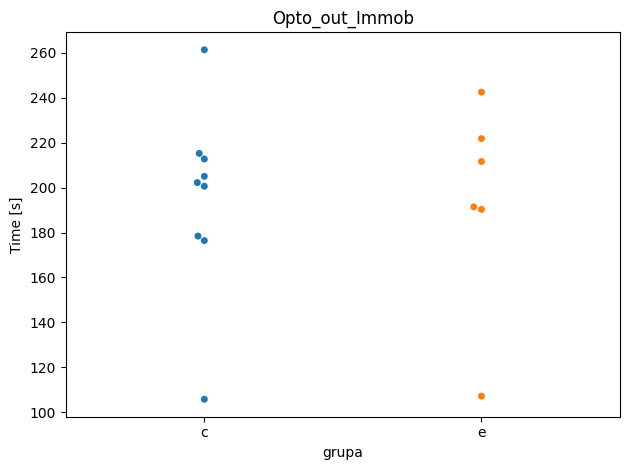

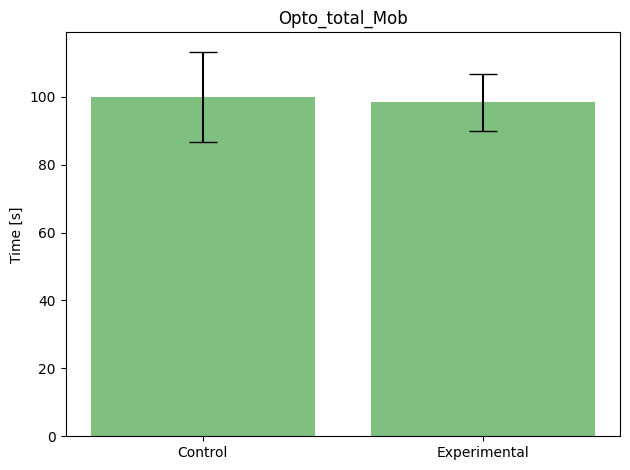

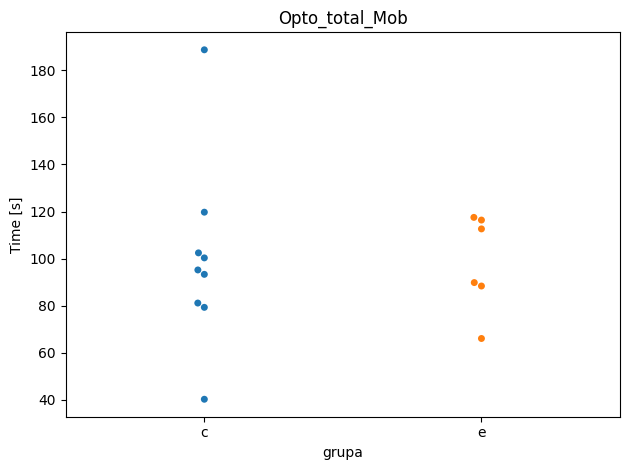

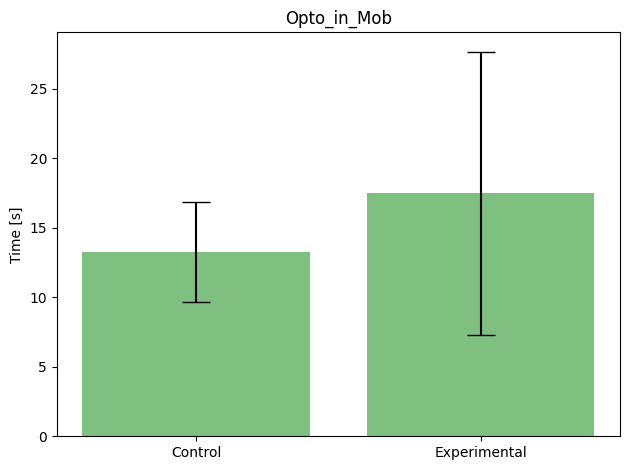

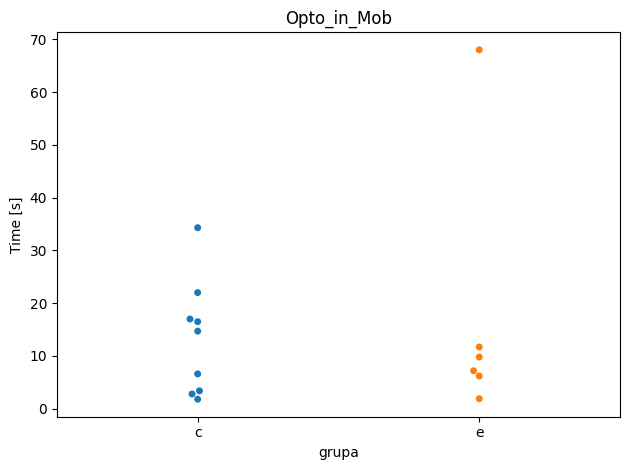

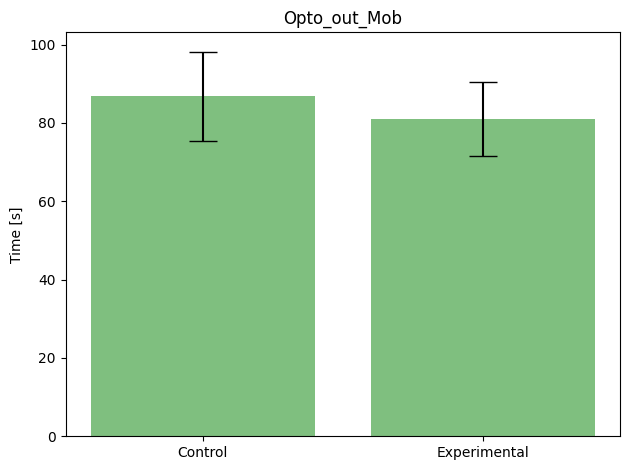

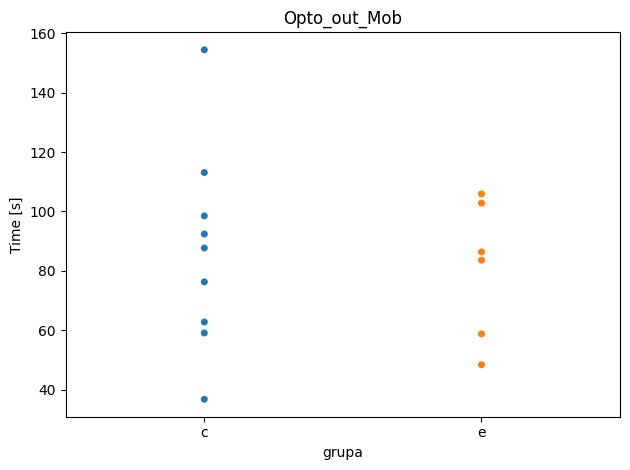

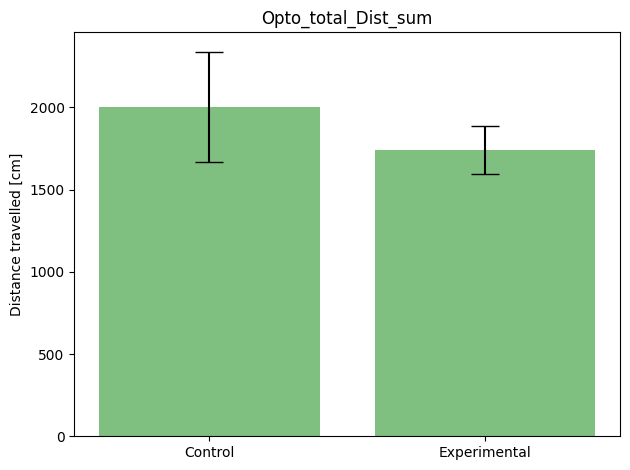

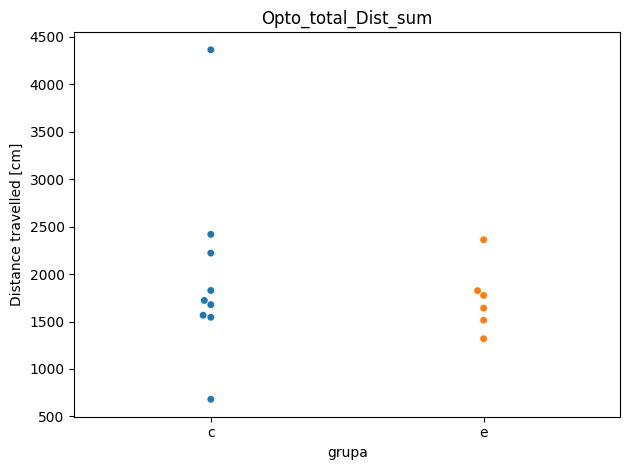

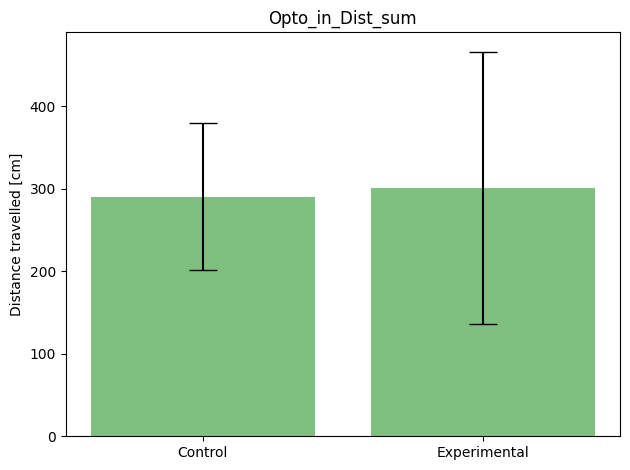

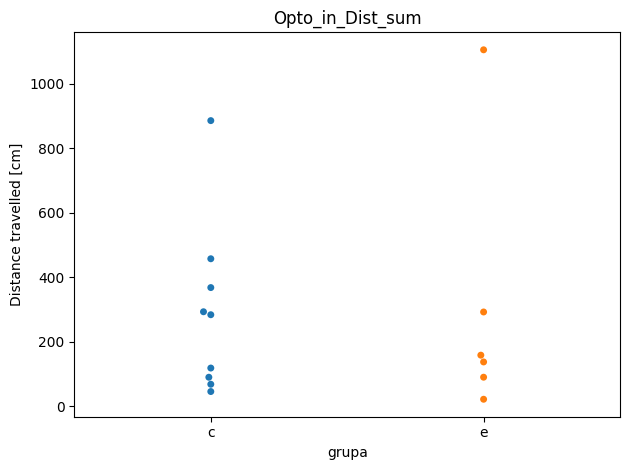

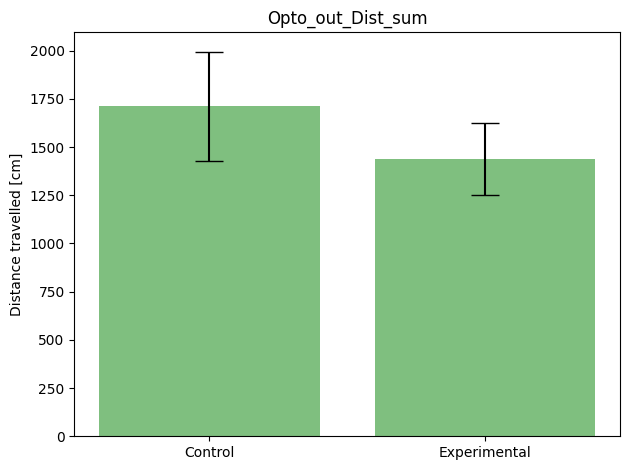

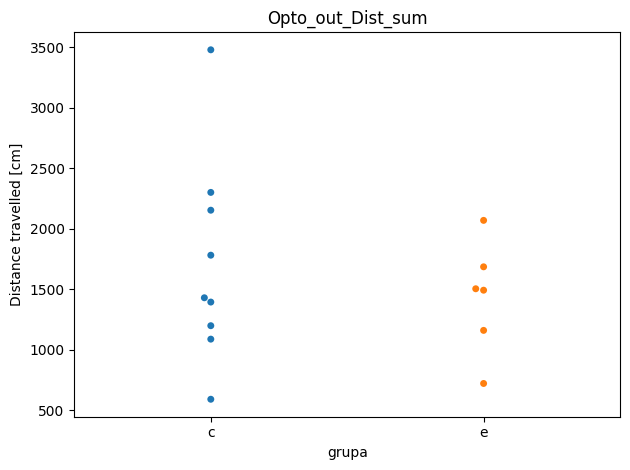

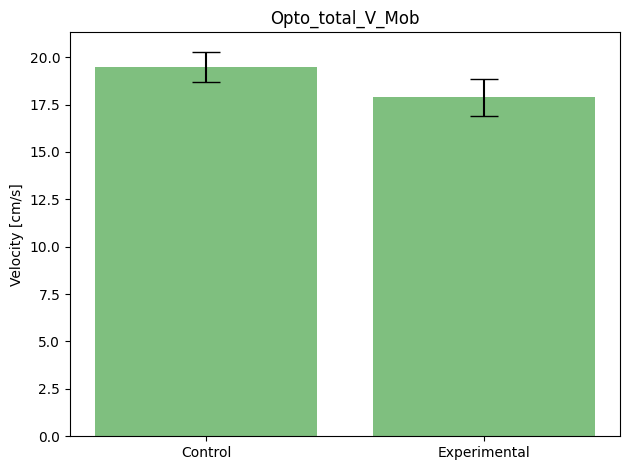

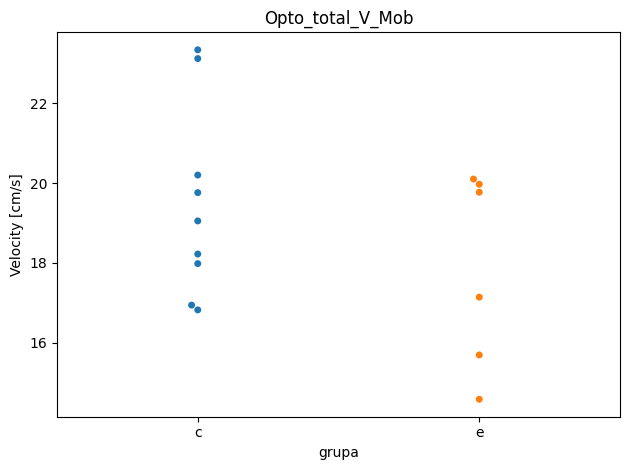

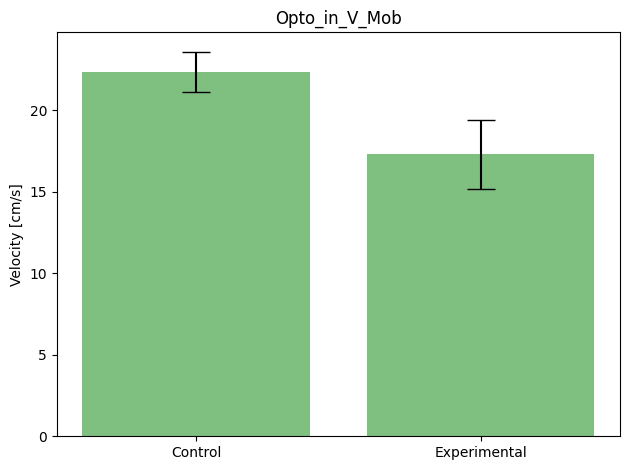

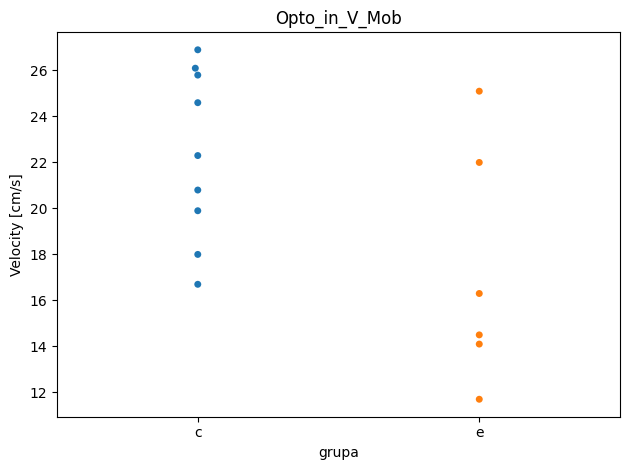

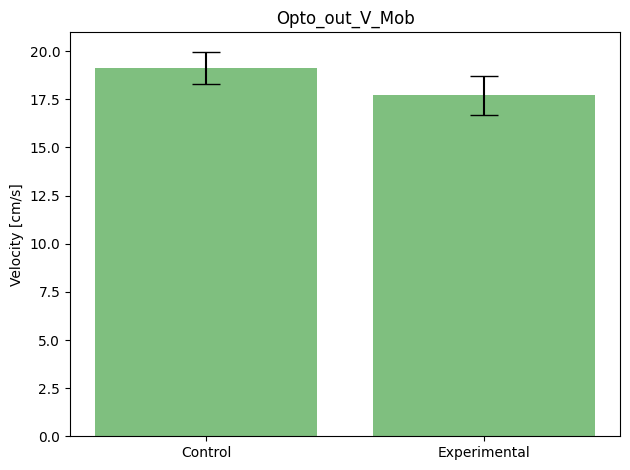

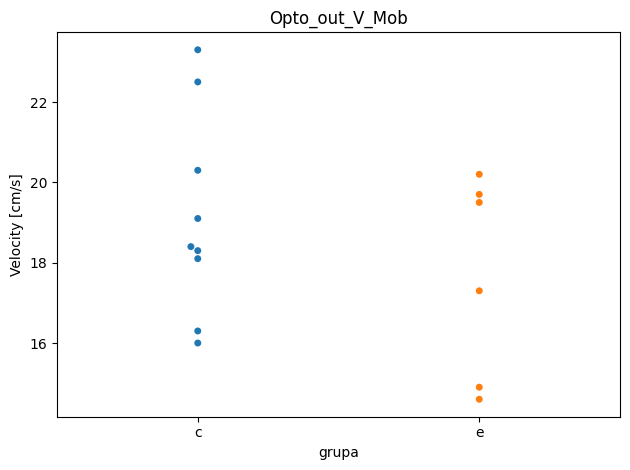

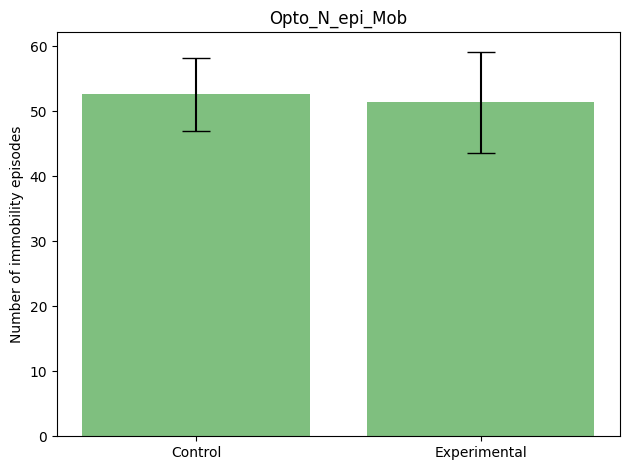

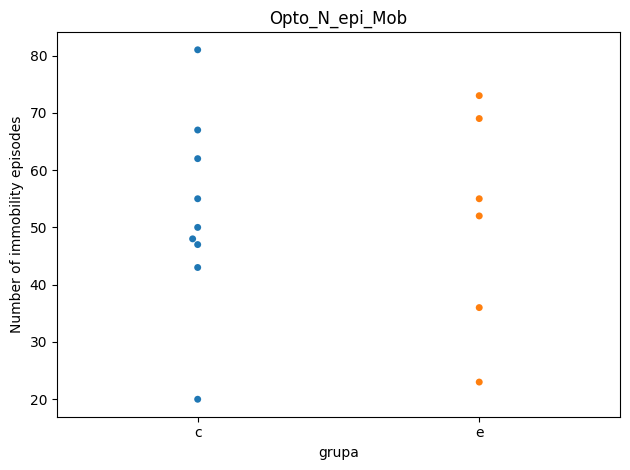

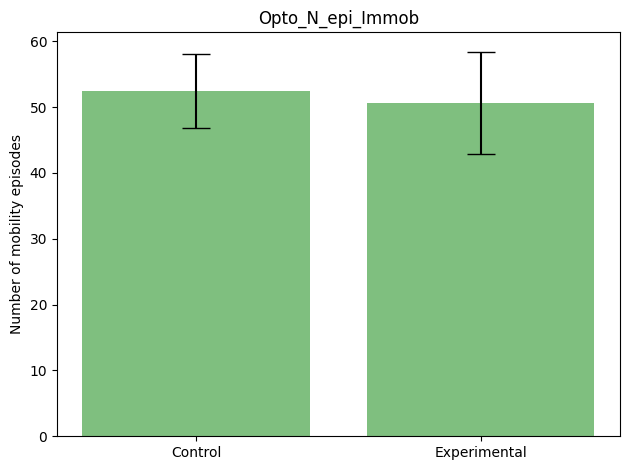

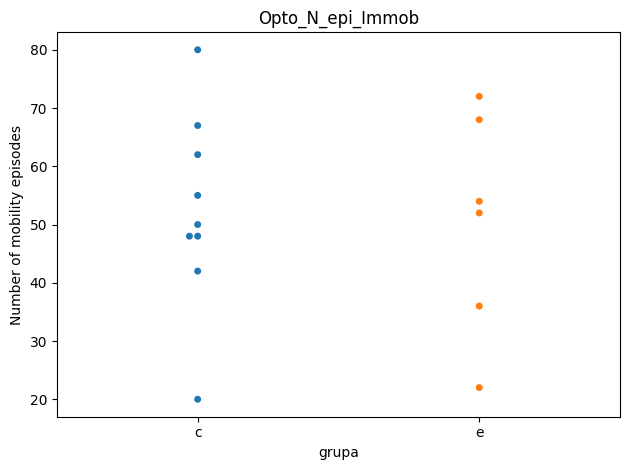

In [82]:
save_to = "C://Users//gniew//Desktop//PRACA//doktorat//behawior//opto_fig"
for h, i in enumerate(opto):
    fig, ax = plt.subplots()
    
    mean_exp = df.loc[df["grupa"] == "e", i].mean()
    mean_ctrl = df.loc[df["grupa"] == "c", i].mean()
    sem_exp = sem(df.loc[df["grupa"] == "e", i])
    sem_ctrl = sem(df.loc[df["grupa"] == "c", i])
    
    x_pos = [1,2]
    groups = ["Control", "Experimental"]
    y_pos = [mean_ctrl, mean_exp]
    error_sem = [sem_ctrl, sem_exp]
    
    ax.bar(x_pos, y_pos, yerr=error_sem, align='center', alpha=0.5, ecolor='black', capsize=10, color = "green")
    ax.set_ylabel(y_title_list[h])
    ax.set_xticks(x_pos)
    ax.set_xticklabels(groups)
    ax.set_title(i)
    plt.tight_layout()
    plt.savefig(save_to + "//" + f"barplot_{i}" + ".svg")
    plt.show()
    sns.swarmplot(data=df, x="grupa", y=i).set(title=i, ylabel= y_title_list[h])
    plt.tight_layout()
    plt.savefig(save_to + "//" + f"swarmplot_{i}" + ".svg")

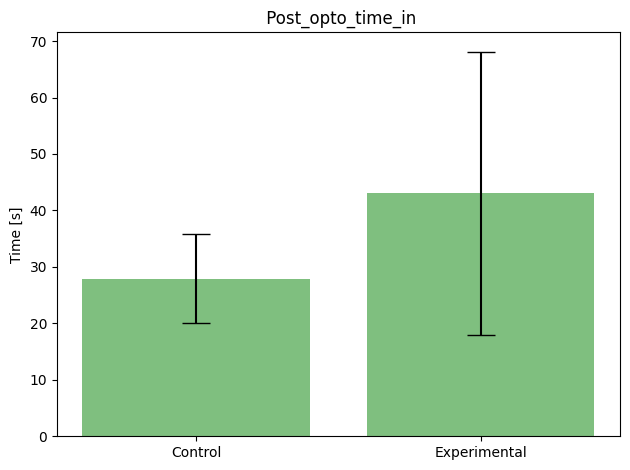

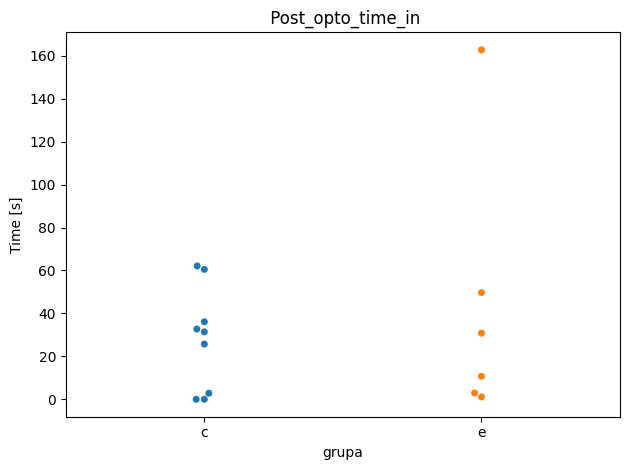

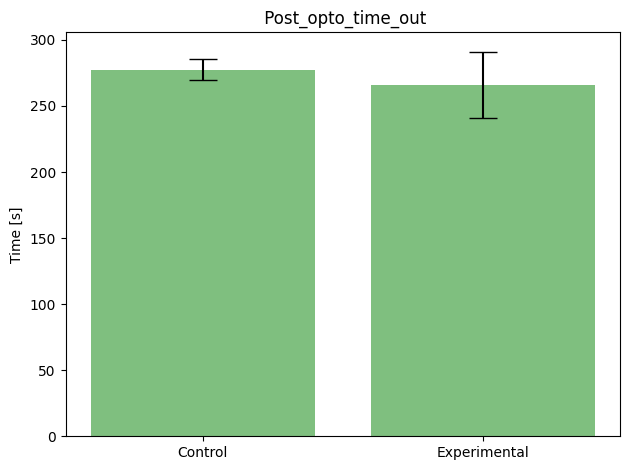

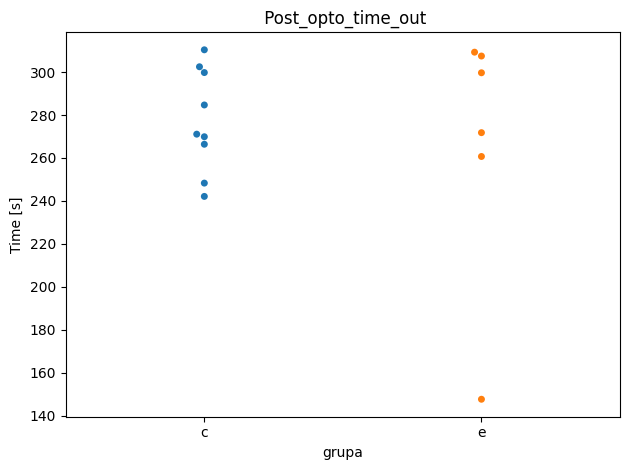

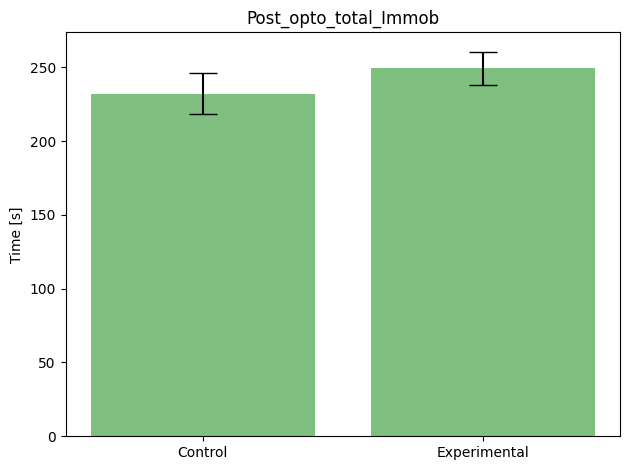

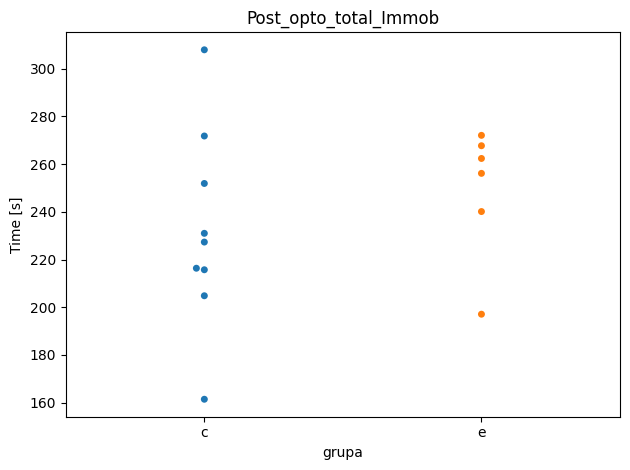

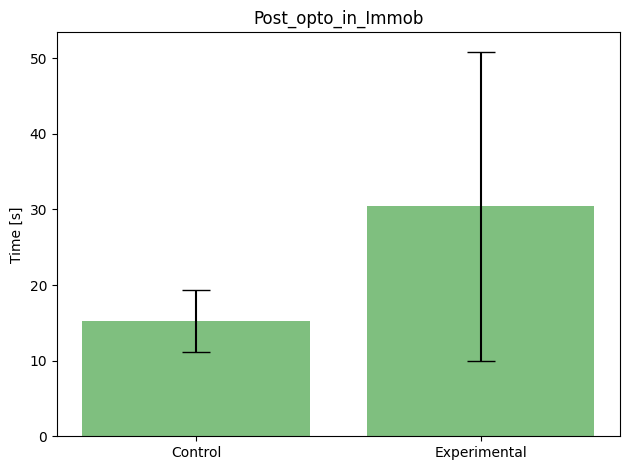

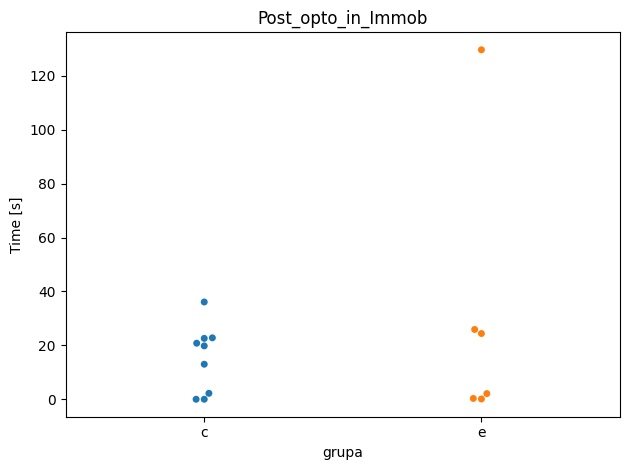

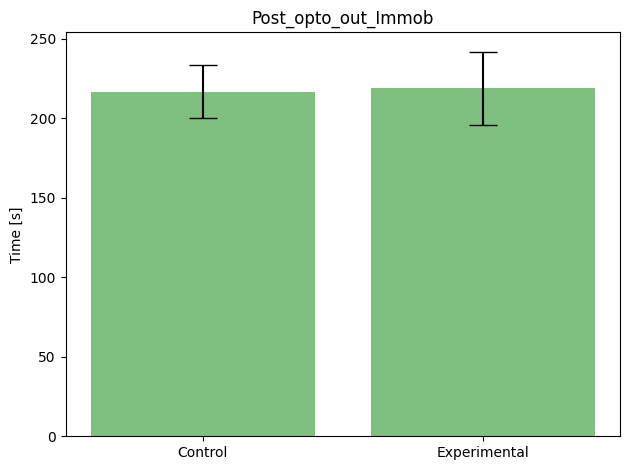

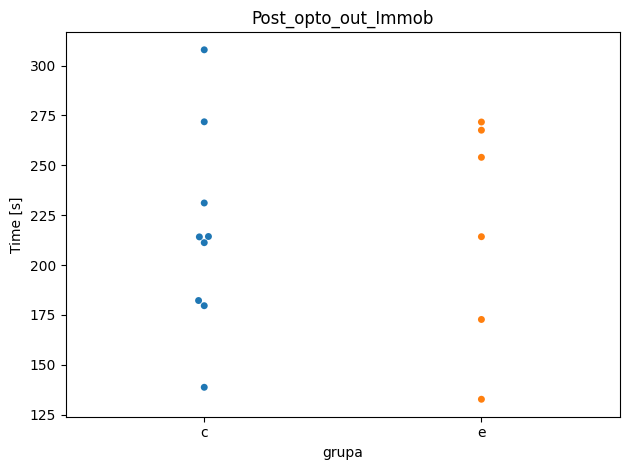

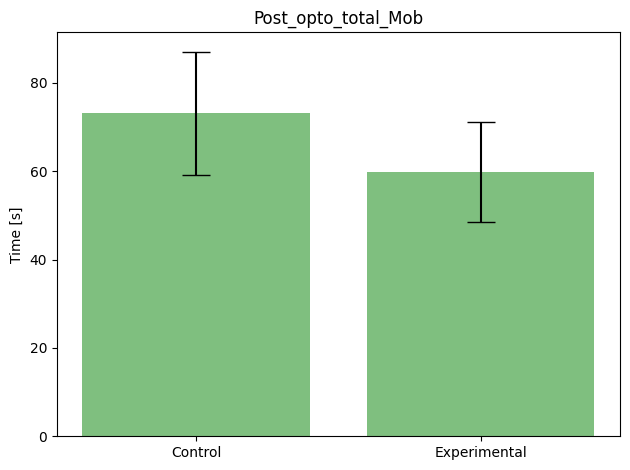

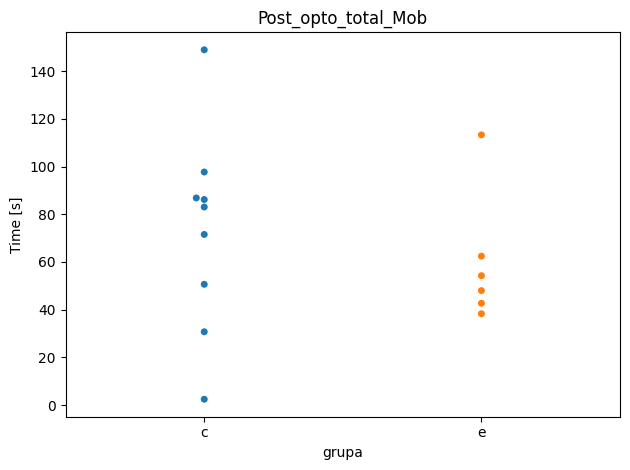

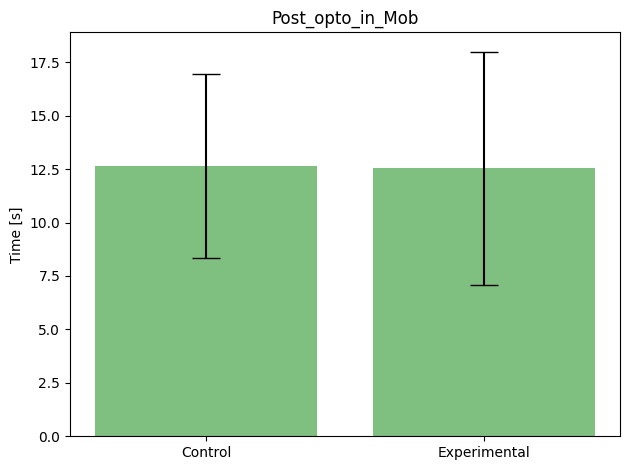

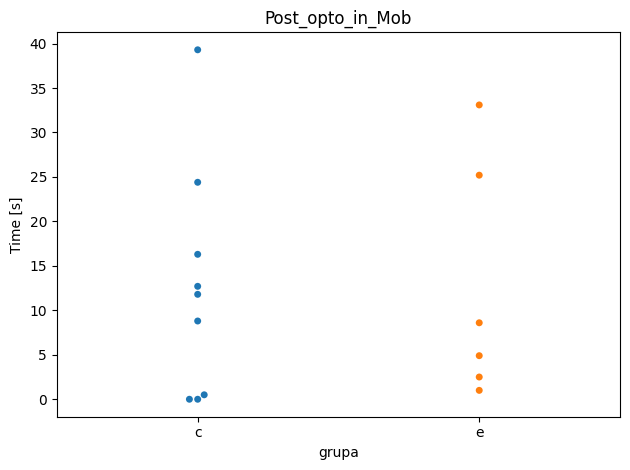

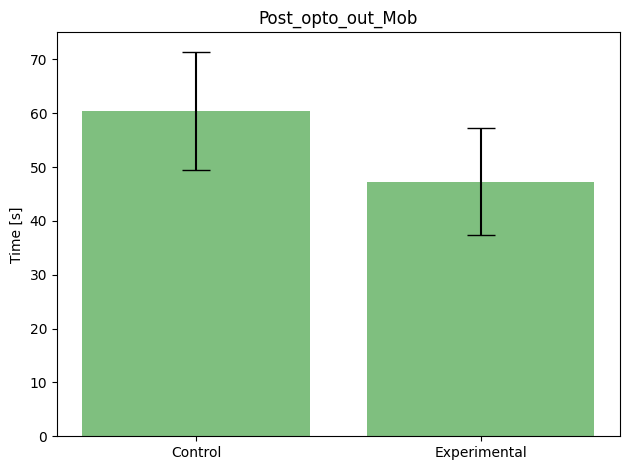

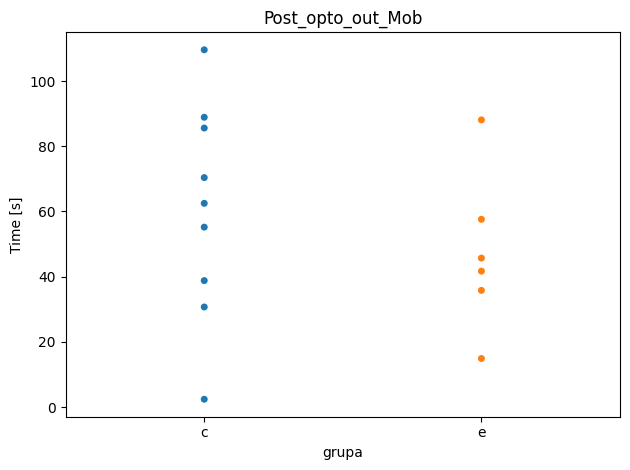

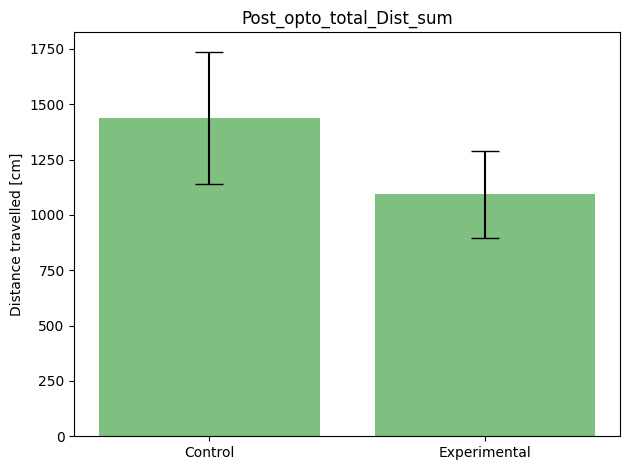

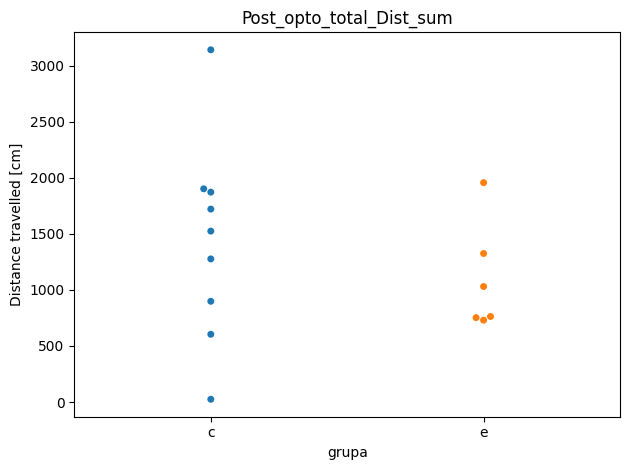

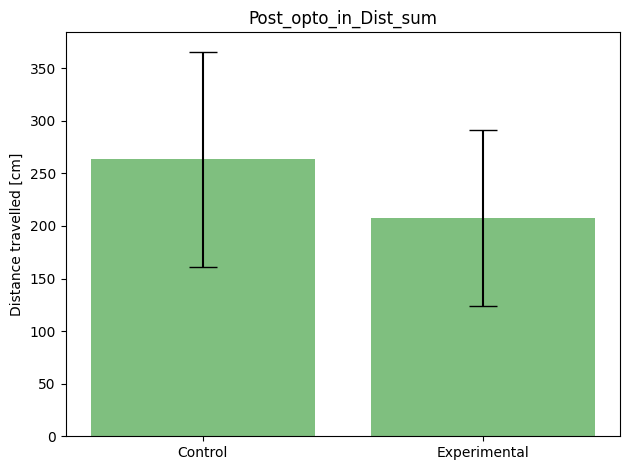

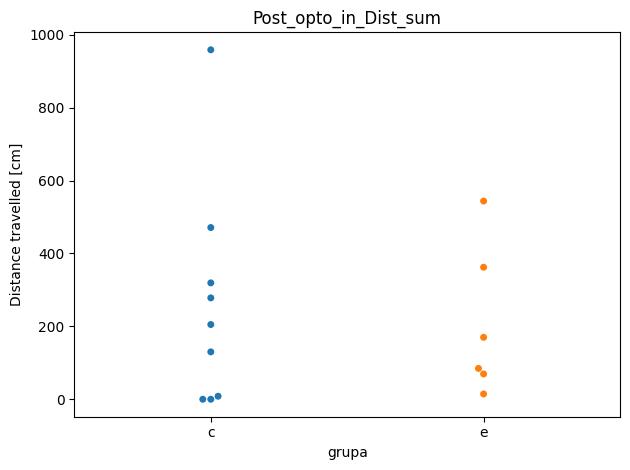

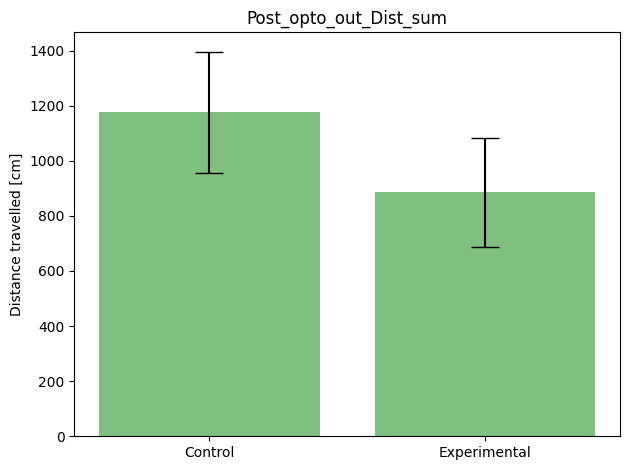

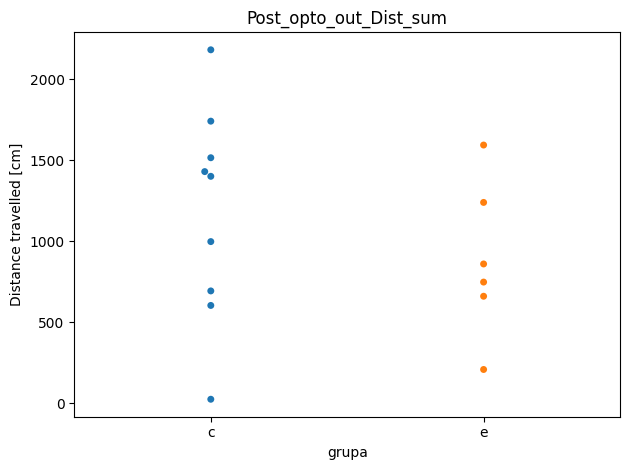

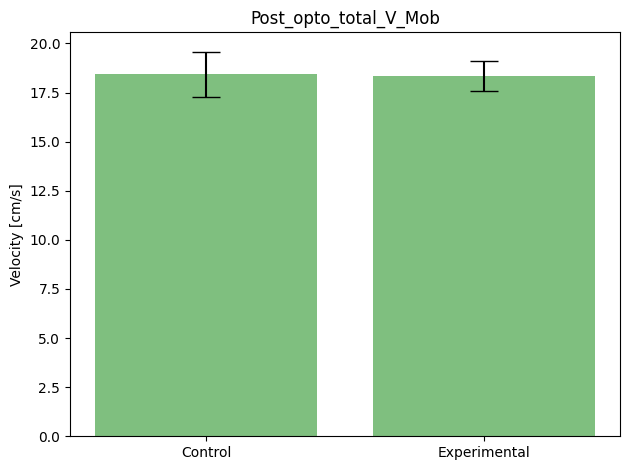

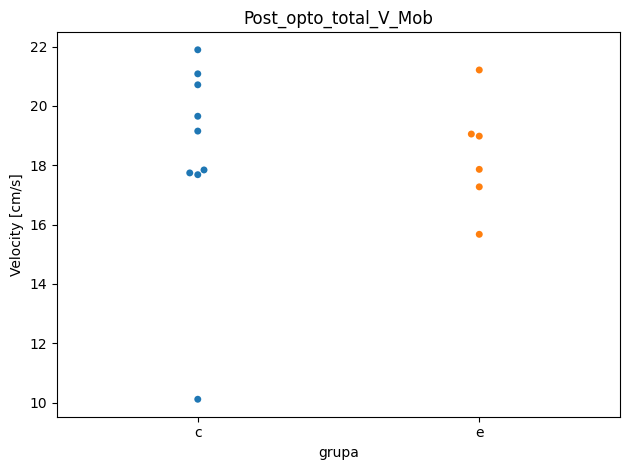

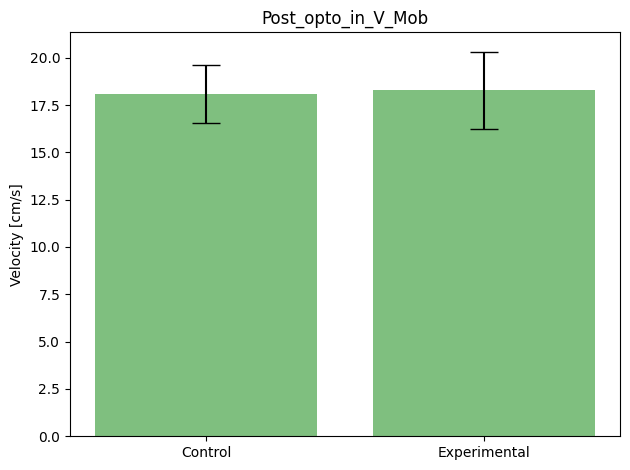

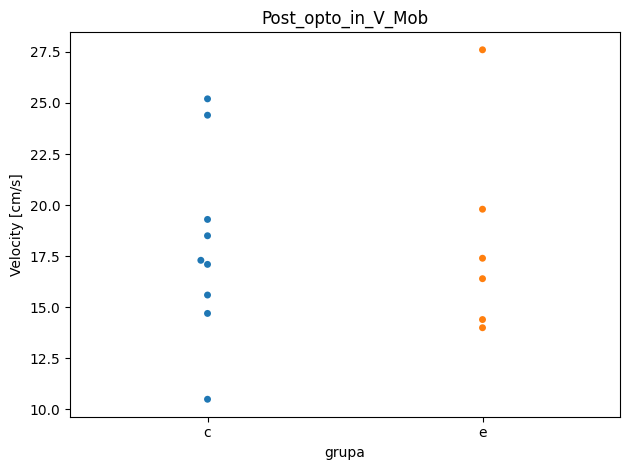

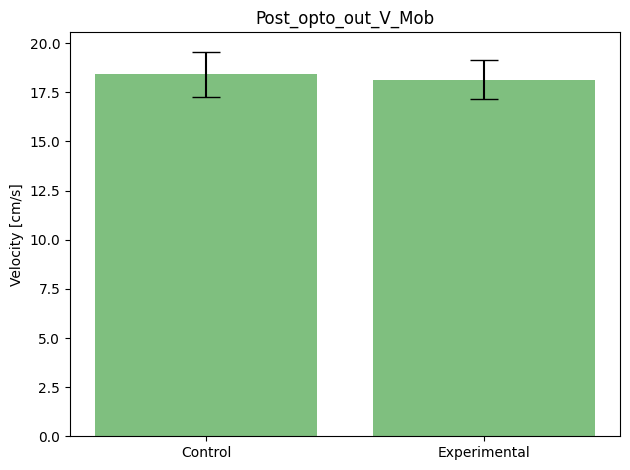

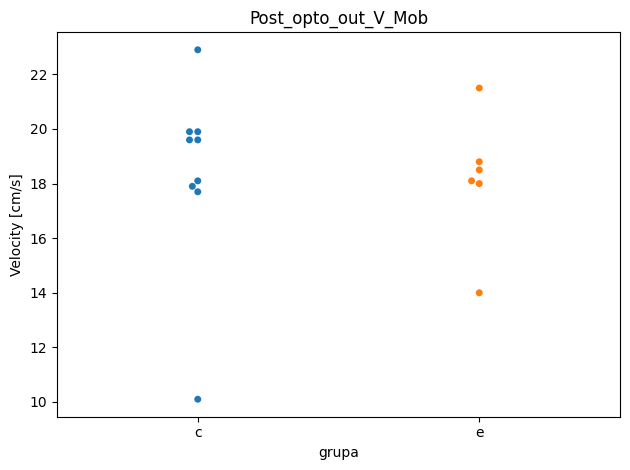

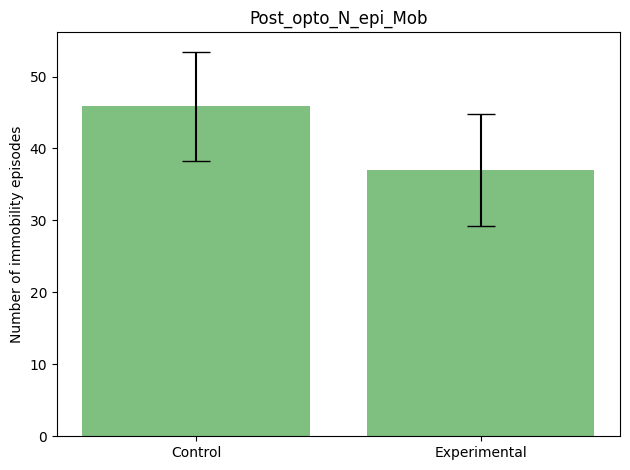

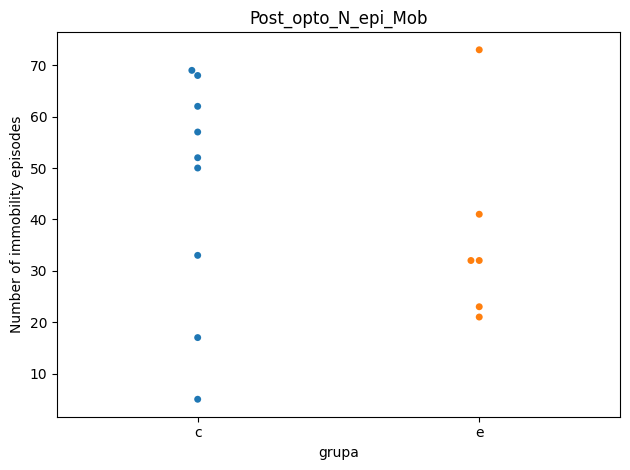

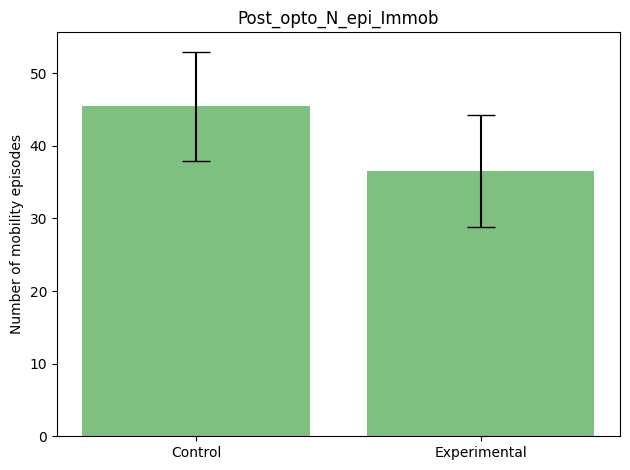

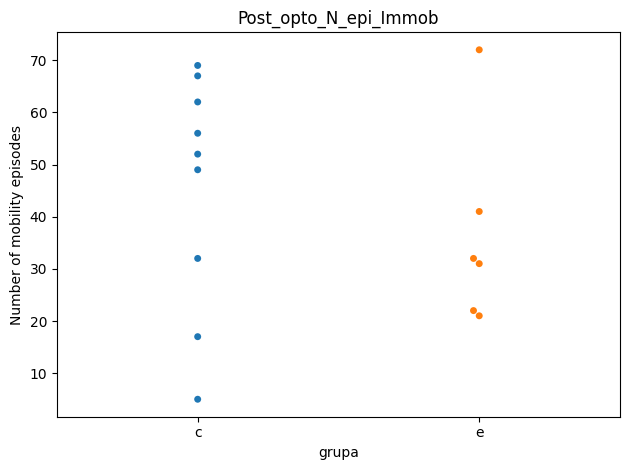

In [83]:
save_to = "C://Users//gniew//Desktop//PRACA//doktorat//behawior//post_opto_fig"
for h, i in enumerate(post_opto):
    fig, ax = plt.subplots()
    
    mean_exp = df.loc[df["grupa"] == "e", i].mean()
    mean_ctrl = df.loc[df["grupa"] == "c", i].mean()
    sem_exp = sem(df.loc[df["grupa"] == "e", i])
    sem_ctrl = sem(df.loc[df["grupa"] == "c", i])
    
    x_pos = [1,2]
    groups = ["Control", "Experimental"]
    y_pos = [mean_ctrl, mean_exp]
    error_sem = [sem_ctrl, sem_exp]
    
    ax.bar(x_pos, y_pos, yerr=error_sem, align='center', alpha=0.5, ecolor='black', capsize=10, color = "green")
    ax.set_ylabel(y_title_list[h])
    ax.set_xticks(x_pos)
    ax.set_xticklabels(groups)
    ax.set_title(i)
    plt.tight_layout()
    plt.savefig(save_to + "//" + f"barplot_{i}" + ".svg")
    plt.show()
    sns.swarmplot(data=df, x="grupa", y=i).set(title=i, ylabel= y_title_list[h])
    plt.tight_layout()
    plt.savefig(save_to + "//" + f"swarmplot_{i}" + ".svg")

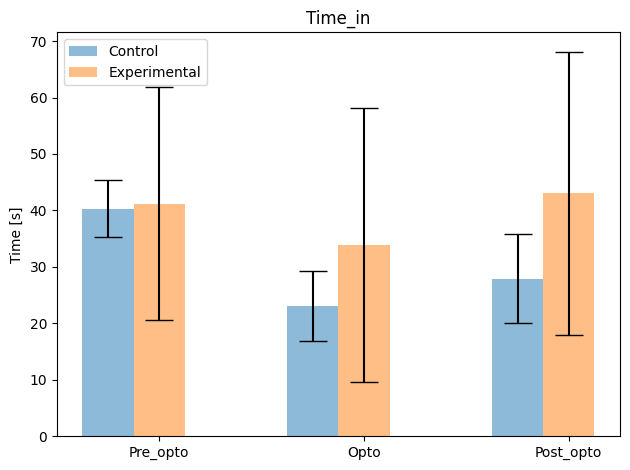

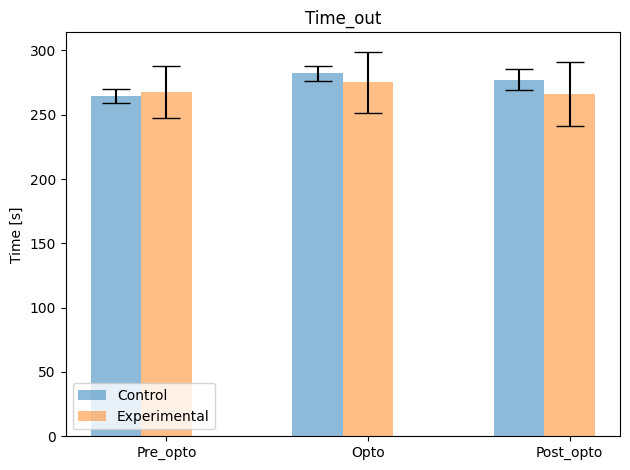

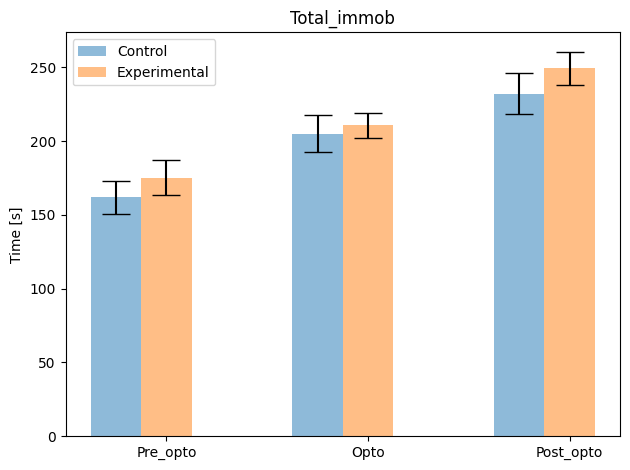

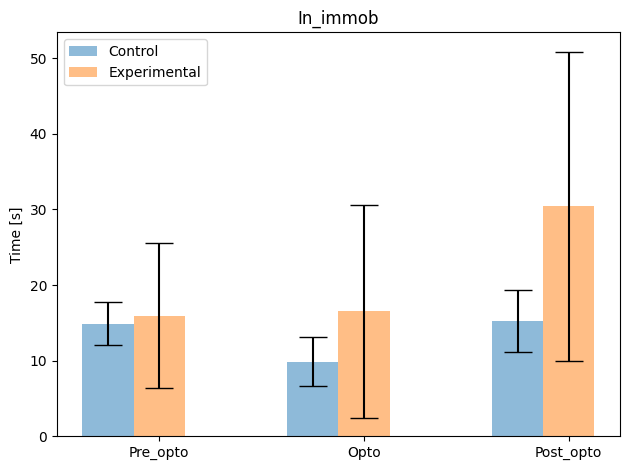

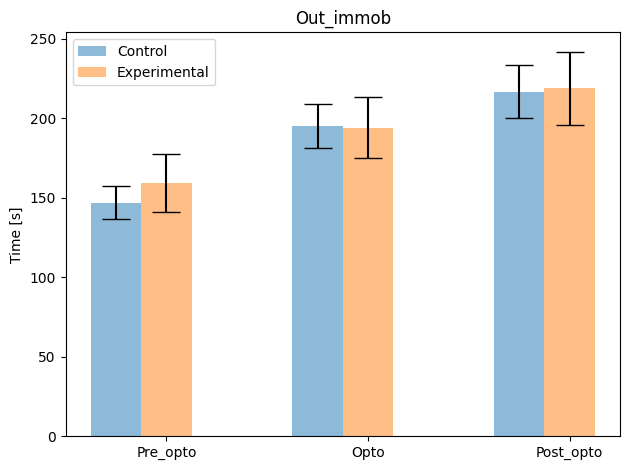

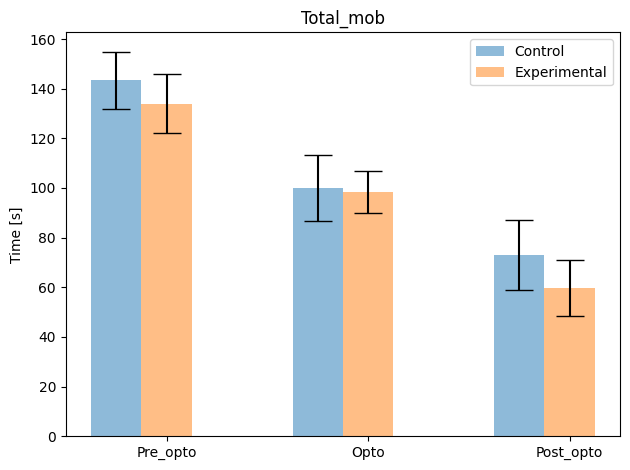

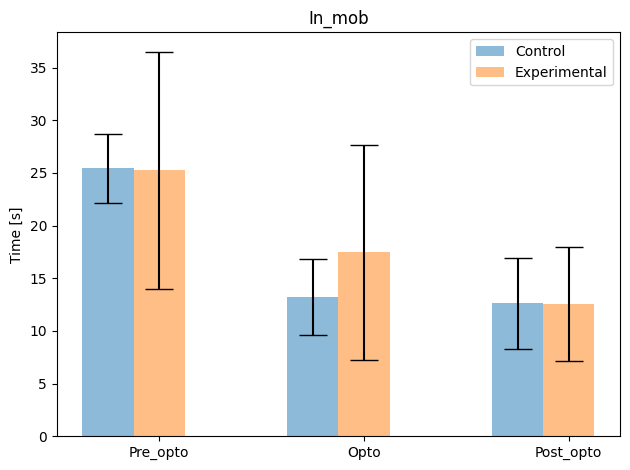

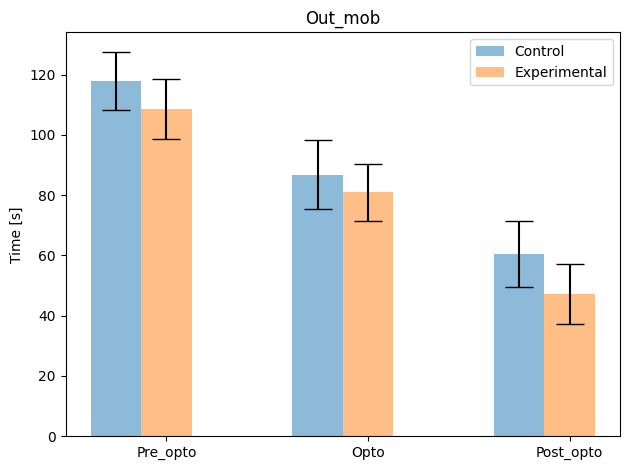

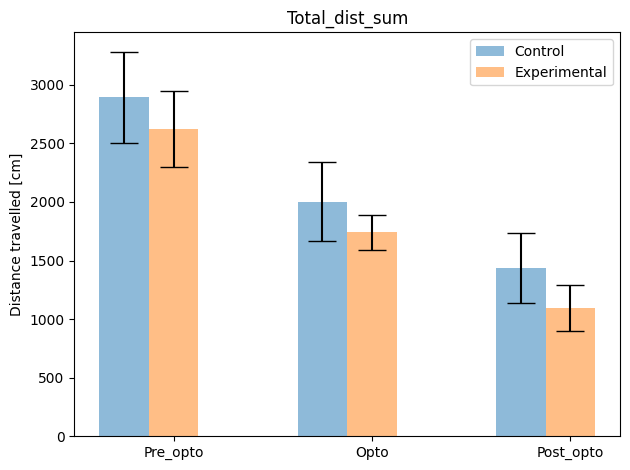

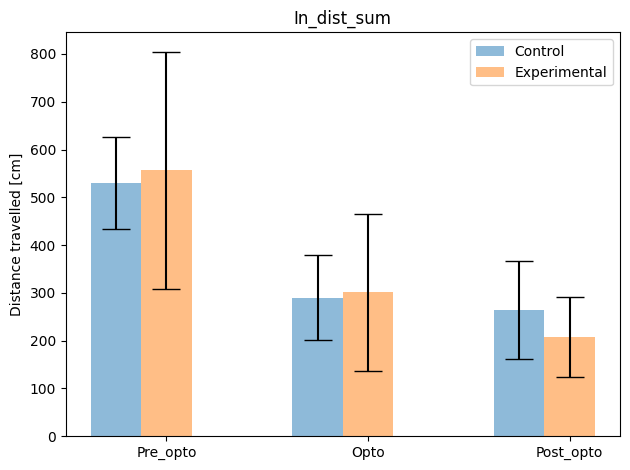

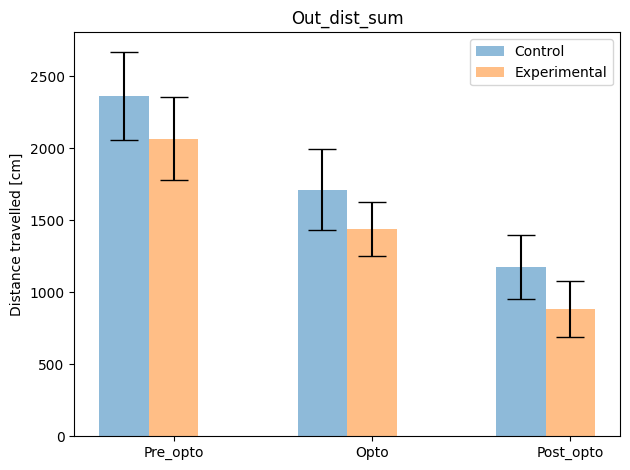

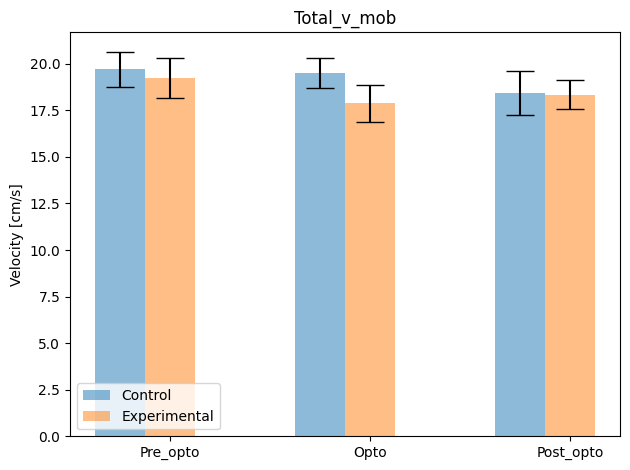

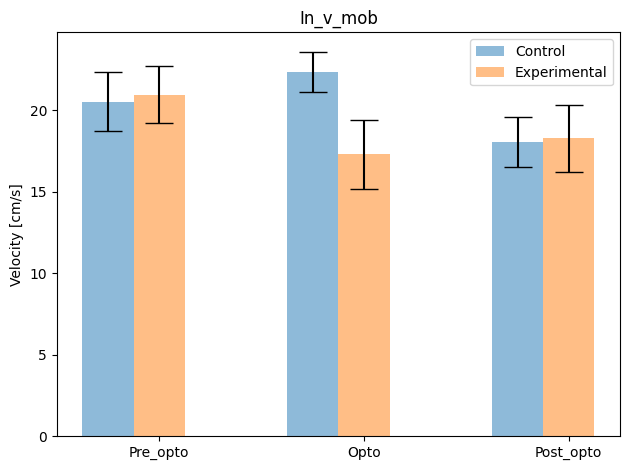

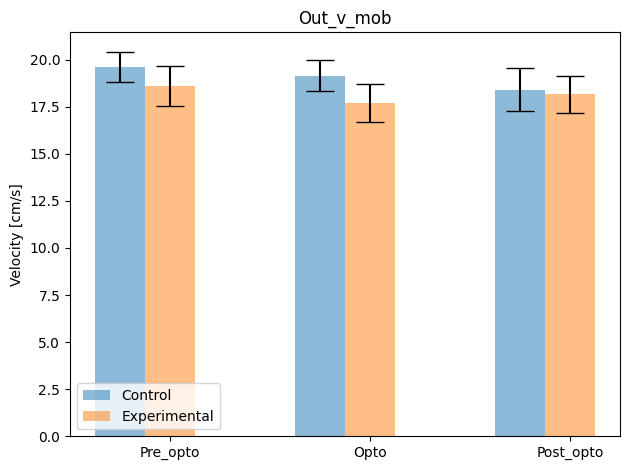

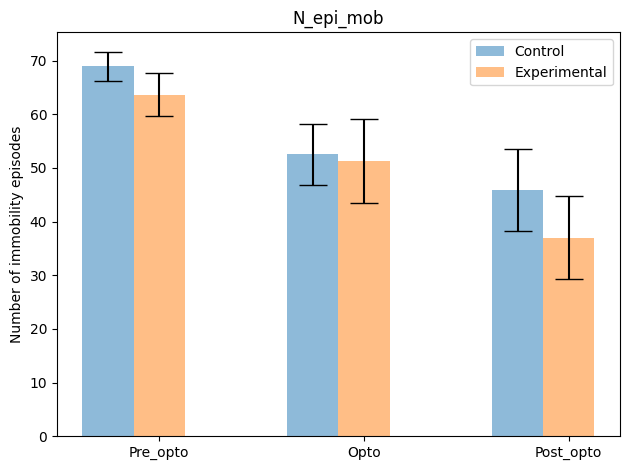

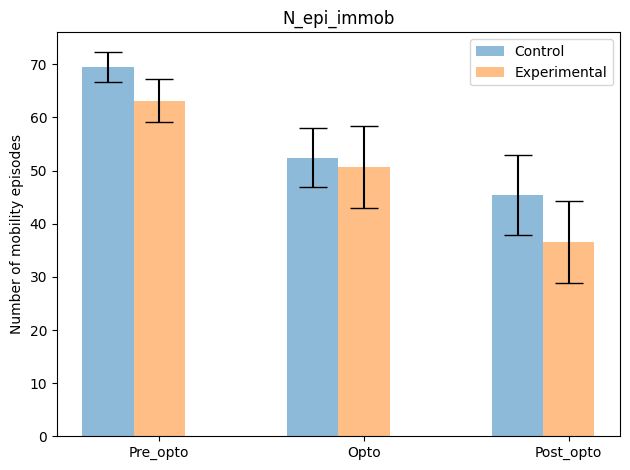

In [95]:
save_to = "C://Users//gniew//Desktop//PRACA//doktorat//behawior//fig_mix"


groups = ["Control", "Experimental"]
exp_part = ["Pre_opto", "Opto", "Post_opto"]
x_pos = np.arange(len(exp_part))  # the label locations

for h, i in enumerate(pre_opto):
    fig, ax = plt.subplots()
    
    width = 0.25  # the width of the bars
    multiplier = 0
    mean_exp_pre = df.loc[df["grupa"] == "e", i].mean()
    mean_ctrl_pre = df.loc[df["grupa"] == "c", i].mean()
    sem_exp_pre = sem(df.loc[df["grupa"] == "e", i])
    sem_ctrl_pre = sem(df.loc[df["grupa"] == "c", i])
    
    mean_exp_opto = df.loc[df["grupa"] == "e", opto[h]].mean()
    mean_ctrl_opto = df.loc[df["grupa"] == "c", opto[h]].mean()
    sem_exp_opto = sem(df.loc[df["grupa"] == "e", opto[h]])
    sem_ctrl_opto = sem(df.loc[df["grupa"] == "c", opto[h]])
    
    mean_exp_post = df.loc[df["grupa"] == "e", post_opto[h]].mean()
    mean_ctrl_post = df.loc[df["grupa"] == "c", post_opto[h]].mean()
    sem_exp_post = sem(df.loc[df["grupa"] == "e", post_opto[h]])
    sem_ctrl_post = sem(df.loc[df["grupa"] == "c", post_opto[h]])
    
    
    y_pos = [[mean_ctrl_pre, mean_ctrl_opto, mean_ctrl_post], [mean_exp_pre, mean_exp_opto, mean_exp_post]]
    error_sem = [[sem_ctrl_pre, sem_ctrl_opto, sem_ctrl_post], [sem_exp_pre, sem_exp_opto, sem_exp_post]]
    for j,k in enumerate(y_pos):
        offset = width * multiplier
        rects = ax.bar(x_pos + offset, k, yerr=error_sem[j], alpha=0.5, ecolor='black', capsize=10, width = width, label=groups[j])
        multiplier +=1
    ax.set_ylabel(y_title_list[h])
    ax.set_xticks(x_pos + width, exp_part)
    ax.legend(loc='best')
    i = i.replace('Pre_opto_', '')
    i = i.capitalize()
    ax.set_title(i)
    plt.tight_layout()
    plt.savefig(save_to + "//" + f"group_barplot_{i}" + ".svg")
    plt.show()
    